In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Fuzzy_Attack

# Data Preprocessing

**Step 1: Data Collection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/Fuzzy_dataset.csv')
# prompt: change coloum names with attributes Timestamp, CAN ID, DLC, DATA[0], DATA[1], DATA[2], DATA[3], DATA[4], DATA[5], DATA[6], DATA[7], Flag

df.columns = ['Timestamp', 'CAN ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag']
df

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478196e+09,02b0,5,ff,7f,00,05,49,R,NaN,NaN,NaN
1,1.478196e+09,0002,8,00,00,00,00,00,01,07,15,R
2,1.478196e+09,0153,8,00,21,10,ff,00,ff,00,00,R
3,1.478196e+09,0130,8,19,80,00,ff,fe,7f,07,60,R
4,1.478196e+09,0131,8,17,80,00,00,65,7f,07,9f,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3838854,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
3838855,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
3838856,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
3838857,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


**step 2: Data Cleaning**\
 **---> Removal of duplicates**

In [ ]:
# Removing of duplicate values
df.drop_duplicates(inplace=True)
# handling null values
df.dropna(inplace=True)
df

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
1,1.478196e+09,0002,8,00,00,00,00,00,01,07,15,R
2,1.478196e+09,0153,8,00,21,10,ff,00,ff,00,00,R
3,1.478196e+09,0130,8,19,80,00,ff,fe,7f,07,60,R
4,1.478196e+09,0131,8,17,80,00,00,65,7f,07,9f,R
5,1.478196e+09,0140,8,00,00,00,00,02,20,27,a8,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3838854,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
3838855,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
3838856,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
3838857,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


**step 3: Data Transfermation**\
 **----> Splitting data_field**

In [ ]:
# prompt: Splitting data_field

# Convert the column to string type before applying the split
df['DATA[0]'] = df['DATA[0]'].astype(str).apply(lambda x: x.split(' ')[0])
df['DATA[1]'] = df['DATA[1]'].astype(str).apply(lambda x: x.split(' ')[0])
df['DATA[2]'] = df['DATA[2]'].astype(str).apply(lambda x: x.split(' ')[0])
df['DATA[3]'] = df['DATA[3]'].astype(str).apply(lambda x: x.split(' ')[0])
df['DATA[4]'] = df['DATA[4]'].astype(str).apply(lambda x: x.split(' ')[0])
df['DATA[5]'] = df['DATA[5]'].astype(str).apply(lambda x: x.split(' ')[0])
df['DATA[6]'] = df['DATA[6]'].astype(str).apply(lambda x: x.split(' ')[0])
df['DATA[7]'] = df['DATA[7]'].astype(str).apply(lambda x: x.split(' ')[0])

**----> Changing non numerical coloums into numerical coloums**

In [ ]:
# prompt: change non numerical data coloums in numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['DATA[0]'] = le.fit_transform(df['DATA[0]'])
df['DATA[1]'] = le.fit_transform(df['DATA[1]'])
df['DATA[2]'] = le.fit_transform(df['DATA[2]'])
df['DATA[3]'] = le.fit_transform(df['DATA[3]'])
df['DATA[4]'] = le.fit_transform(df['DATA[4]'])
df['DATA[5]'] = le.fit_transform(df['DATA[5]'])
df['DATA[6]'] = le.fit_transform(df['DATA[6]'])
df['DATA[7]'] = le.fit_transform(df['DATA[7]'])
df['Flag'] = le.fit_transform(df['Flag'])

**-----> Conversion of hexadecimal values**

In [ ]:
# Convert HEX data to decimal for numerical processing
for col in ['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']:
    df[col] = df[col].apply(lambda x: int(x, 16) if isinstance(x, str) else x)
df

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
1,1.478196e+09,2,8,0,0,0,0,0,1,7,21,0
2,1.478196e+09,339,8,0,33,16,255,0,255,0,0,0
3,1.478196e+09,304,8,25,128,0,255,254,127,7,96,0
4,1.478196e+09,305,8,23,128,0,0,101,127,7,159,0
5,1.478196e+09,320,8,0,0,0,0,2,32,39,168,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3838854,1.478201e+09,399,8,254,89,0,0,0,65,0,0,0
3838855,1.478201e+09,608,8,24,33,33,48,8,143,109,25,0
3838856,1.478201e+09,672,8,36,0,154,29,151,2,189,0,0
3838857,1.478201e+09,809,8,220,183,127,20,17,32,0,20,0


**Step 4: Data Normalization**

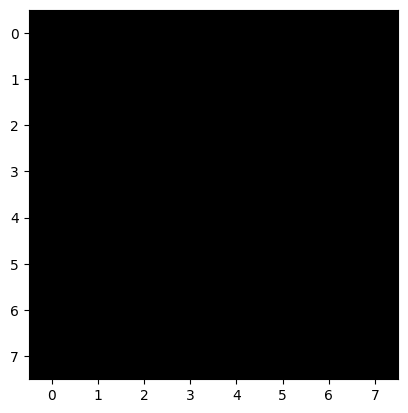

In [ ]:
import numpy as np

# Convert each row of the DataFrame to a 2D array of size 8x8
# Handle rows with unexpected length
images = []
for row in df.values:
    try:
        # Attempt to reshape the row into an 8x8 array
        image = np.array(row[3:11], dtype=np.uint8).reshape(8, 8)
    except ValueError:
        # If reshaping fails, create an 8x8 array filled with zeros
        image = np.zeros((8, 8), dtype=np.uint8)
    images.append(image)

images = np.array(images)  # Convert the list of images to a NumPy array

# Plot the first image as an example
plt.imshow(images[0], cmap='gray')
plt.show()

**----> Feature Scaling**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reshape the images array to 2D
images_2D = images.reshape(images.shape[0], -1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 2D images data
scaler.fit(images_2D)

# Transform the 2D images data using the fitted scaler
scaled_images = scaler.transform(images_2D)

# Print the first 5 rows of the scaled data
print(scaled_images[0:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**----> Quantile Normalization**

In [ ]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer, StandardScaler

# Code to create the 'images' array should be added here.
# For example, if 'images' was created from a DataFrame 'df' as in
# the provided 'ipython-input-13-d13f7217e7bc' file, you would include that code here.

# Assuming 'images' is already defined from previous steps
# Reshape the images array to 2D
images_2D = images.reshape(images.shape[0], -1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 2D images data
scaler.fit(images_2D)

# Transform the 2D images data using the fitted scaler
scaled_images = scaler.transform(images_2D) # Calculate scaled_images

# Create a QuantileTransformer object
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Fit the transformer to the scaled images data
quantile_transformer.fit(scaled_images)

# Transform the scaled images data using the fitted transformer
normalized_images = quantile_transformer.transform(scaled_images)

# Print the first 5 rows of the normalized data
print(normalized_images[0:5])

[[-5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758]
 [-5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758

In [ ]:
from scipy.stats import rankdata
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample data - replace with your actual data
images = np.random.rand(100, 28, 28)

# Reshape the images array to 2D
images_2D = images.reshape(images.shape[0], -1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 2D images data
scaler.fit(images_2D)

# Transform the 2D images data using the fitted scaler
scaled_images = scaler.transform(images_2D) # Calculate scaled_images

# Convert the scaled data to ranks
ranked_data = rankdata(scaled_images)

# Apply quantile normalization to the ranked data
normalized_data = np.quantile(ranked_data, np.linspace(0, 1, len(ranked_data)))

# Print the first 5 rows of the normalized data
print(normalized_data[0:5])

[1. 2. 3. 4. 5.]


**Step 5: Image Generation**

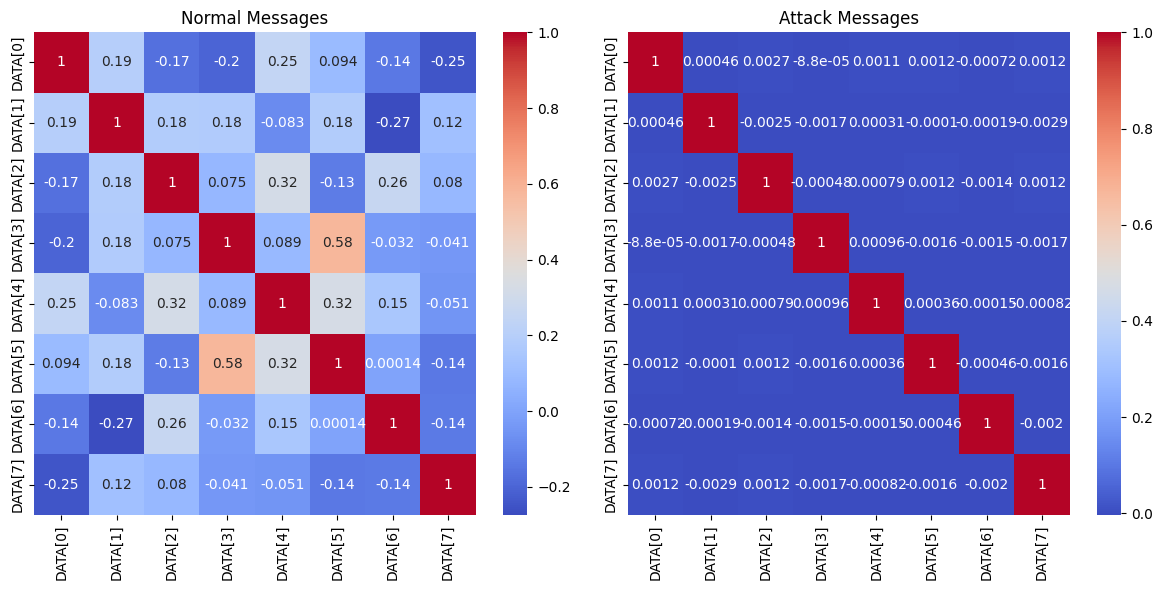

In [ ]:
# prompt: image generation for normal and attack message in colormap

# Separate normal and attack messages
normal_df = df[df['Flag'] == 0]
attack_df = df[df['Flag'] == 1]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Normal messages
sns.heatmap(normal_df[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].corr(), annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Normal Messages')

# Attack messages
sns.heatmap(attack_df[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].corr(), annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Attack Messages')

plt.tight_layout()
plt.show()


**Step 6: Label Encoding**

In [ ]:
# prompt: Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Flag' column
df['Flag'] = label_encoder.fit_transform(df['Flag'])

# Display the updated DataFrame
df


,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
1,1.478196e+09,2,8,0,0,0,0,0,1,7,21,0
2,1.478196e+09,339,8,0,33,16,255,0,255,0,0,0
3,1.478196e+09,304,8,25,128,0,255,254,127,7,96,0
4,1.478196e+09,305,8,23,128,0,0,101,127,7,159,0
5,1.478196e+09,320,8,0,0,0,0,2,32,39,168,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3838854,1.478201e+09,399,8,254,89,0,0,0,65,0,0,0
3838855,1.478201e+09,608,8,24,33,33,48,8,143,109,25,0
3838856,1.478201e+09,672,8,36,0,154,29,151,2,189,0,0
3838857,1.478201e+09,809,8,220,183,127,20,17,32,0,20,0


***Step 7: Anomaly Detection Specific Features***

In [ ]:
# prompt: Anomaly Detection Specific Features
#  Enhance the model’s ability to detect anomalies by adding derived features.

# Calculate the difference between consecutive timestamps
df['Timestamp_diff'] = df['Timestamp'].diff()

# Calculate the difference between consecutive CAN IDs
df['CAN_ID_diff'] = df['CAN ID'].diff()

# Calculate the sum of the payload values
df['Payload_sum'] = df[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].sum(axis=1)

# Calculate the standard deviation of the payload values
df['Payload_std'] = df[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].std(axis=1)

# Display the updated DataFrame
df


,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag,Timestamp_diff,CAN_ID_diff,Payload_sum,Payload_std
1,1.478196e+09,2,8,0,0,0,0,0,1,7,21,0,NaN,NaN,29,7.424621
2,1.478196e+09,339,8,0,33,16,255,0,255,0,0,0,0.000239,337.0,559,114.850757
3,1.478196e+09,304,8,25,128,0,255,254,127,7,96,0,0.000738,-35.0,892,101.760222
4,1.478196e+09,305,8,23,128,0,0,101,127,7,159,0,0.000246,1.0,545,67.023317
5,1.478196e+09,320,8,0,0,0,0,2,32,39,168,0,0.000245,15.0,241,57.956726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838854,1.478201e+09,399,8,254,89,0,0,0,65,0,0,0,0.000225,-391.0,408,89.326048
3838855,1.478201e+09,608,8,24,33,33,48,8,143,109,25,0,0.000230,209.0,423,47.375212
3838856,1.478201e+09,672,8,36,0,154,29,151,2,189,0,0,0.000234,64.0,561,80.212998
3838857,1.478201e+09,809,8,220,183,127,20,17,32,0,20,0,0.000232,137.0,619,86.384419


**Step 8: Feature Selection**

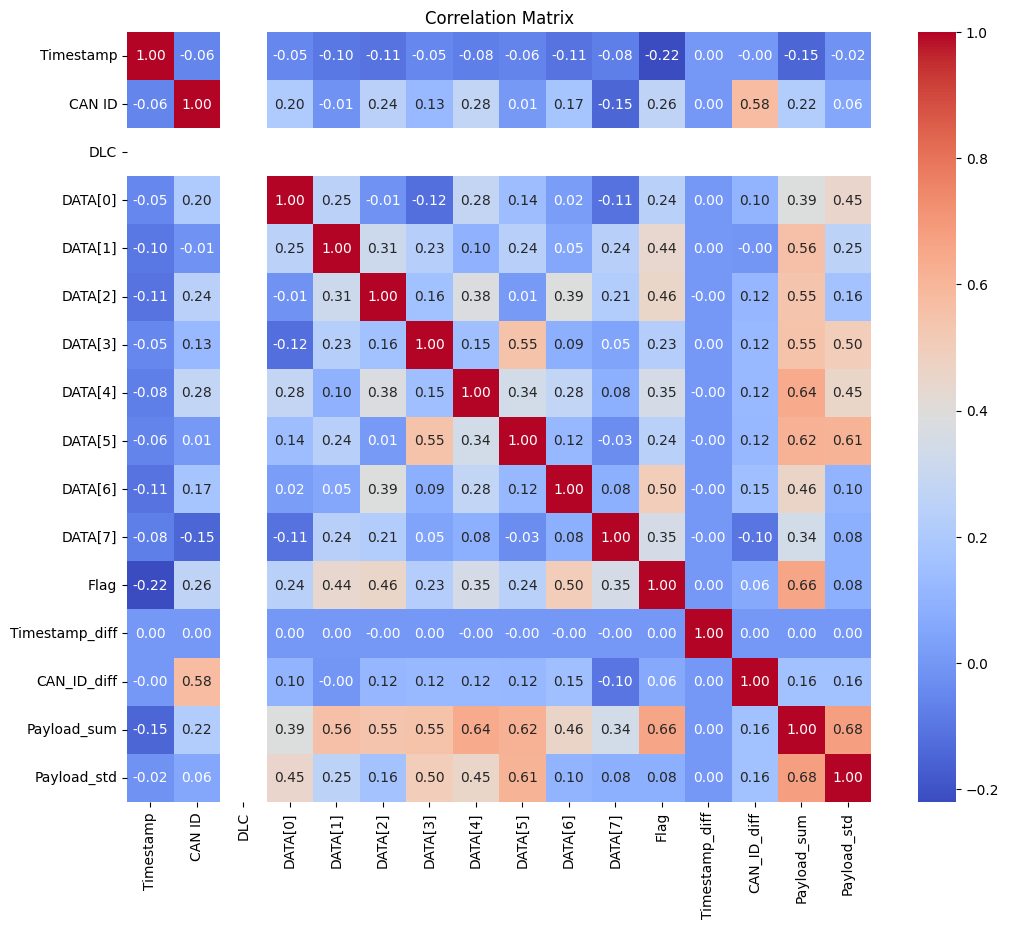

Relevant features: ['Timestamp', 'CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag', 'Payload_sum']


In [ ]:
# prompt: Feature Selection

# Feature Selection

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Select features based on correlation with the target variable
# Example: Select features with correlation above a threshold
threshold = 0.1
relevant_features = correlation_matrix['Flag'][abs(correlation_matrix['Flag']) > threshold].index.tolist()
print("Relevant features:", relevant_features)

# You can also use other feature selection techniques like:
# - Recursive Feature Elimination (RFE)
# - SelectKBest
# - Feature Importance from Tree-based models


**Step 9: Extracting and splitting data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Extract the CAN ID and Flag columns
X = df['CAN ID'].astype(str).values  # Convert CAN ID to strings
y = df['Flag'].values

# Tokenize the CAN messages
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)  # Now X contains strings
X_seq = tokenizer.texts_to_sequences(X)

# ... rest of the code

# Pad the sequences to ensure uniform input size
max_len = max(len(x) for x in X_seq)
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post')

# Reshape data to fit the CNN input format (samples, timesteps, features)
X_padded = X_padded.reshape(X_padded.shape[0], X_padded.shape[1], 1)

# Convert target to categorical
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes of the datasets to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2625716, 1, 1)
X_val shape: (562653, 1, 1)
X_test shape: (562654, 1, 1)
y_train shape: (2625716, 2)
y_val shape: (562653, 2)
y_test shape: (562654, 2)


#Building Models

**1.Model Architecture for hybrid CNN-LSTM model**

In [ ]:
# prompt: Building Hybrid CNN-LSTM Model
from tensorflow.keras.layers import Input, Reshape # Import Input and Reshape
from tensorflow.keras.models import Model  # Import the Model class

# Define the input
input_layer = Input(shape=(X_train.shape[1], 1))

# Add 1D CNN layers
cnn_out = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
cnn_out = Conv1D(64, 3, activation='relu', padding='same')(cnn_out)
cnn_out = MaxPooling1D(pool_size=1)(cnn_out)

# Flatten the output from the CNN layers
cnn_out = Flatten()(cnn_out)

# Add LSTM layers
lstm_out = Reshape((1, -1))(cnn_out)
lstm_out = LSTM(50, return_sequences=True)(lstm_out)
lstm_out = LSTM(50)(lstm_out)

# Add fully connected layers
dense_out = Dense(50, activation='relu')(lstm_out)
dense_out = Dropout(0.5)(dense_out)
# Handle NaN values and convert 'y' to a consistent type (e.g., string)
y_processed = np.where(pd.isna(y), 'NaN', y).astype(str)  # Replace NaNs with 'NaN' string and convert to string type

# Now calculate unique classes
num_classes = len(np.unique(y_processed))
output_layer = Dense(num_classes, activation='softmax')(dense_out)

# Create the model
fuzzy_cnn_lstm_model = Model(inputs=input_layer, outputs=output_layer) # Now 'Model' is defined

# Compile the model
fuzzy_cnn_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
fuzzy_cnn_lstm_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 1, 50)               │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,188 (203.86 KB)

 Trainable params: 52,188 (203.86 KB)

 Non-trainable params: 0 (0.00 B)

**Encoding the target labels and train Hybrid CNN-LSTM model**

In [ ]:
# prompt: Encoding the target labels and train Hybrid CNN-LSTM model

# Assuming 'Flag' column has two unique values and is already one-hot encoded
y_train_encoded = np.argmax(y_train, axis=1)
y_val_encoded = np.argmax(y_val, axis=1)

# The rest of the code remains the same
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Change the file extension to '.keras'
model_checkpoint = ModelCheckpoint('fuzzy_cnn_lstm.keras', monitor='val_accuracy', save_best_only=True)

history = fuzzy_cnn_lstm_model.fit(
    X_train, y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val_categorical),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 274s 13ms/step - accuracy: 0.9974 - loss: 0.0227 - val_accuracy: 0.9983 - val_loss: 0.0122
Epoch 2/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 256s 10ms/step - accuracy: 0.9982 - loss: 0.0125 - val_accuracy: 0.9983 - val_loss: 0.0119
Epoch 3/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 202s 10ms/step - accuracy: 0.9981 - loss: 0.0128 - val_accuracy: 0.9983 - val_loss: 0.0120
Epoch 4/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 197s 9ms/step - accuracy: 0.9982 - loss: 0.0123 - val_accuracy: 0.9983 - val_loss: 0.0119
Epoch 5/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 200s 9ms/step - accuracy: 0.9982 - loss: 0.0122 - val_accuracy: 0.9983 - val_loss: 0.0121
Epoch 6/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 190s 9ms/step - accuracy: 0.9982 - loss: 0.0123 - val_accuracy: 0.9983 - val_loss: 0.0120
Epoch 7/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 205s 9ms/step - accuracy: 0.9982 - loss: 0.0125 - val_accuracy: 0.9983 - val_loss: 0.0122
Epoch 8/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 201s 9ms/step -

**Evaluate the hybrid CNN LSTM model**

Test Loss: 0.0121
Test Accuracy: 0.9982
17583/17583 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    489122
           1       1.00      0.99      0.99     73532

    accuracy                           1.00    562654
   macro avg       1.00      0.99      1.00    562654
weighted avg       1.00      1.00      1.00    562654



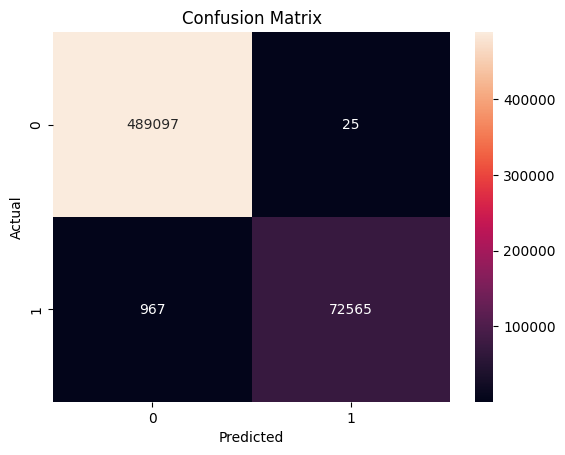

In [ ]:
# prompt: Evaluate the hybrid CNN-LSTM model

# Evaluate the model on the test set
loss, accuracy = fuzzy_cnn_lstm_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = fuzzy_cnn_lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Training and validation accuracy/loss vs. epochs of the Hybrid CNN-LSTM Model**

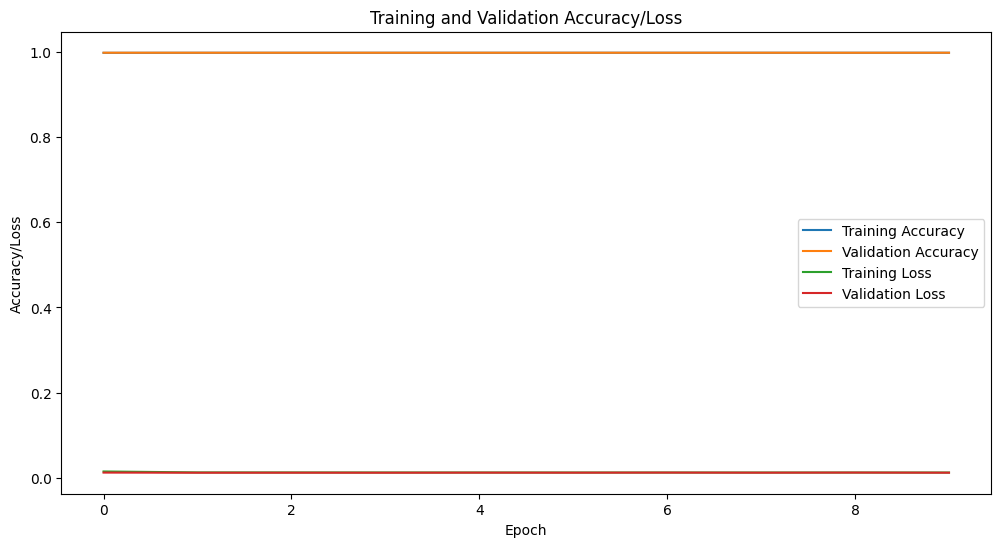

In [ ]:
# prompt: Training and validation accuracy/loss vs. epochs of the Hybrid CNN-LSTM Model in single graph

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


In [ ]:
# prompt: Evaluate the hybrid CNN LSTM model along with ROC in table

from sklearn.metrics import roc_curve, auc

# Evaluate the model on the test set
y_pred_proba = fuzzy_cnn_lstm_model.predict(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Generate classification report
report = classification_report(y_test_classes, y_pred_classes, output_dict=True)

# Create a DataFrame from the classification report
report_df = pd.DataFrame(report).transpose()

# Add ROC AUC to the DataFrame
report_df.loc['ROC AUC'] = {'precision': roc_auc, 'recall': '', 'f1-score': '', 'support': ''}

# Display the DataFrame
print(report_df)


17583/17583 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step
              precision    recall  f1-score   support
0              0.998027  0.999949  0.998987  489122.0
1              0.999656  0.986849  0.993211   73532.0
accuracy       0.998237  0.998237  0.998237  0.998237
macro avg      0.998841  0.993399  0.996099  562654.0
weighted avg   0.998240  0.998237  0.998232  562654.0
ROC AUC        0.995086                              


**2. Model Architecture for hybrid TL model**

In [ ]:
# prompt: build a hybrid TL model

from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Reshape
from tensorflow.keras.models import Model

# Define the input
input_layer = Input(shape=(X_train.shape[1], 1))

# Add 1D CNN layers
cnn_out = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
cnn_out = Conv1D(64, 3, activation='relu', padding='same')(cnn_out)
cnn_out = MaxPooling1D(pool_size=1)(cnn_out)

# Flatten the output from the CNN layers
cnn_out = Flatten()(cnn_out)

# Add fully connected layers
dense_out = Dense(50, activation='relu')(cnn_out)
dense_out = Dropout(0.5)(dense_out)

# Handle NaN values and convert 'y' to a consistent type (e.g., string)
y_processed = np.where(pd.isna(y), 'NaN', y).astype(str)  # Replace NaNs with 'NaN' string and convert to string type

# Now calculate unique classes
num_classes = len(np.unique(y_processed))
output_layer = Dense(num_classes, activation='softmax')(dense_out)

# Create the model
fuzzy_tl_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
fuzzy_tl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
fuzzy_tl_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,688 (37.84 KB)

 Trainable params: 9,688 (37.84 KB)

 Non-trainable params: 0 (0.00 B)

**Training Hybrid TL Model**

In [ ]:
# prompt: train the above hybrid TL model

# Assuming 'Flag' column has two unique values and is already one-hot encoded
y_train_encoded = np.argmax(y_train, axis=1)
y_val_encoded = np.argmax(y_val, axis=1)

# The rest of the code remains the same
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Change the file extension to '.keras'
model_checkpoint = ModelCheckpoint('fuzzy_tl.keras', monitor='val_accuracy', save_best_only=True)

history = fuzzy_tl_model.fit(
    X_train, y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val_categorical),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 94s 5ms/step - accuracy: 0.9979 - loss: 0.0152 - val_accuracy: 0.9982 - val_loss: 0.0123
Epoch 2/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 134s 4ms/step - accuracy: 0.9981 - loss: 0.0129 - val_accuracy: 0.9979 - val_loss: 0.0123
Epoch 3/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 137s 4ms/step - accuracy: 0.9981 - loss: 0.0128 - val_accuracy: 0.9979 - val_loss: 0.0121
Epoch 4/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.9981 - loss: 0.0127 - val_accuracy: 0.9983 - val_loss: 0.0121
Epoch 5/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 140s 4ms/step - accuracy: 0.9981 - loss: 0.0125 - val_accuracy: 0.9979 - val_loss: 0.0122
Epoch 6/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.9981 - loss: 0.0127 - val_accuracy: 0.9983 - val_loss: 0.0118
Epoch 7/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 133s 6ms/step - accuracy: 0.9981 - loss: 0.0125 - val_accuracy: 0.9983 - val_loss: 0.0119
Epoch 8/10
20514/20514 ━━━━━━━━━━━━━━━━━━━━ 107s 5ms/step - accur

**Evaluate the hybrid TL model**

Test Loss: 0.0120
Test Accuracy: 0.9982
17583/17583 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    489122
           1       1.00      0.99      0.99     73532

    accuracy                           1.00    562654
   macro avg       1.00      0.99      1.00    562654
weighted avg       1.00      1.00      1.00    562654



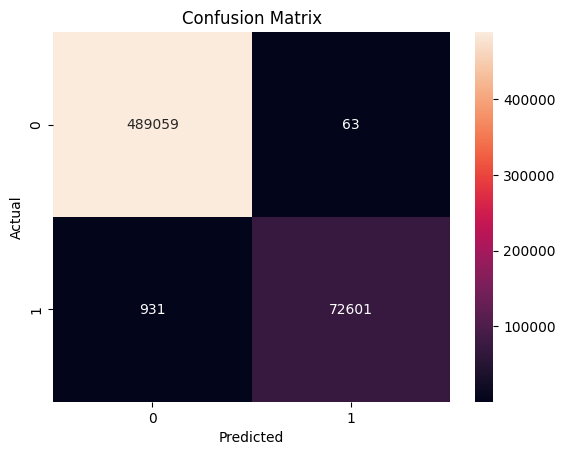

In [ ]:
# prompt: Evaluate the hybrid TL model

# Evaluate the model on the test set
loss, accuracy = fuzzy_tl_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = fuzzy_tl_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Training and validation accuracy/loss vs. epochs of the Hybrid TL Model**

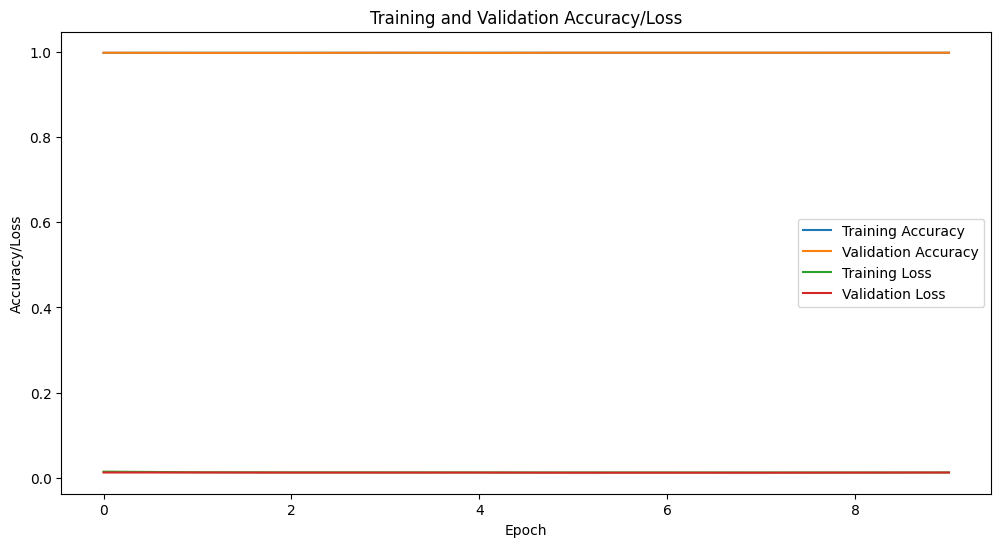

In [ ]:
# **Training and validation accuracy/loss vs. epochs of the Hybrid TL Model**

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

**3. Recurrent Neural Networks (RNNs)**

In [ ]:
# prompt: build a Recurrent Neural Networks (RNNs)

# Define the input
input_layer = Input(shape=(X_train.shape[1], 1))

# Add LSTM layers
lstm_out = LSTM(50, return_sequences=True)(input_layer)
lstm_out = LSTM(50)(lstm_out)

# Add fully connected layers
dense_out = Dense(50, activation='relu')(lstm_out)
dense_out = Dropout(0.5)(dense_out)

# Handle NaN values and convert 'y' to a consistent type (e.g., string)
y_processed = np.where(pd.isna(y), 'NaN', y).astype(str)  # Replace NaNs with 'NaN' string and convert to string type

# Now calculate unique classes
num_classes = len(np.unique(y_processed))
output_layer = Dense(num_classes, activation='softmax')(dense_out)

# Create the model
fuzzy_rnn_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
fuzzy_rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
fuzzy_rnn_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,252 (129.89 KB)

 Trainable params: 33,252 (129.89 KB)

 Non-trainable params: 0 (0.00 B)

**Training the RNNs Model**

In [ ]:
# Assuming 'Flag' column has two unique values and is already one-hot encoded
y_train_encoded = np.argmax(y_train, axis=1)
y_val_encoded = np.argmax(y_val, axis=1)

# The rest of the code remains the same
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Change the file extension to '.keras'
model_checkpoint = ModelCheckpoint('fuzzy_rnn.keras', monitor='val_accuracy', save_best_only=True)

history = fuzzy_rnn_model.fit(
    X_train, y_train_categorical,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val_categorical),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
41027/41027 ━━━━━━━━━━━━━━━━━━━━ 230s 6ms/step - accuracy: 0.9981 - loss: 0.0137 - val_accuracy: 0.9982 - val_loss: 0.0122
Epoch 2/10
41027/41027 ━━━━━━━━━━━━━━━━━━━━ 215s 5ms/step - accuracy: 0.9981 - loss: 0.0127 - val_accuracy: 0.9983 - val_loss: 0.0122
Epoch 3/10
41027/41027 ━━━━━━━━━━━━━━━━━━━━ 264s 5ms/step - accuracy: 0.9981 - loss: 0.0126 - val_accuracy: 0.9983 - val_loss: 0.0120
Epoch 4/10
41027/41027 ━━━━━━━━━━━━━━━━━━━━ 265s 5ms/step - accuracy: 0.9982 - loss: 0.0124 - val_accuracy: 0.9983 - val_loss: 0.0119
Epoch 5/10
41027/41027 ━━━━━━━━━━━━━━━━━━━━ 250s 5ms/step - accuracy: 0.9981 - loss: 0.0126 - val_accuracy: 0.9982 - val_loss: 0.0122
Epoch 6/10
41027/41027 ━━━━━━━━━━━━━━━━━━━━ 220s 5ms/step - accuracy: 0.9982 - loss: 0.0122 - val_accuracy: 0.9979 - val_loss: 0.0129
Epoch 7/10
41027/41027 ━━━━━━━━━━━━━━━━━━━━ 209s 5ms/step - accuracy: 0.9982 - loss: 0.0124 - val_accuracy: 0.9982 - val_loss: 0.0122
Epoch 8/10
41027/41027 ━━━━━━━━━━━━━━━━━━━━ 262s 5ms/step - ac

**Evaluate the RNNs Model**

Test Loss: 0.0121
Test Accuracy: 0.9982
17583/17583 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    489122
           1       1.00      0.99      0.99     73532

    accuracy                           1.00    562654
   macro avg       1.00      0.99      1.00    562654
weighted avg       1.00      1.00      1.00    562654



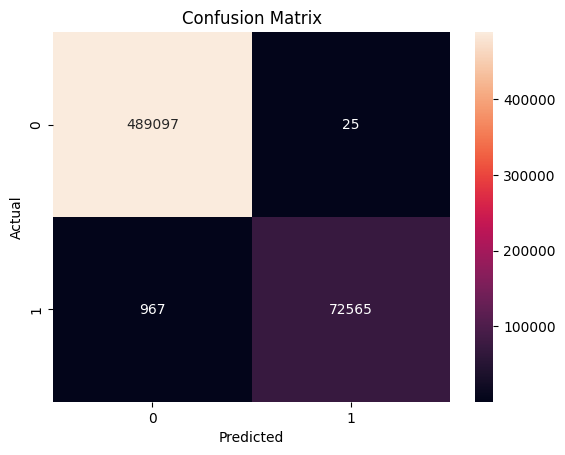

In [ ]:
# Evaluate the model on the test set
loss, accuracy = fuzzy_rnn_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = fuzzy_rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Training and validation accuracy/loss vs. epochs of the RNNs Model**

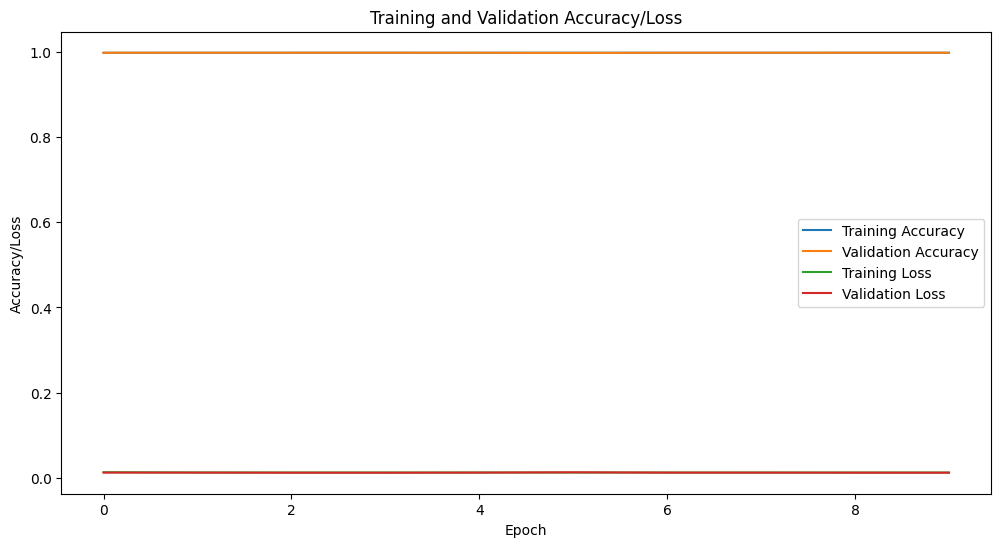

In [ ]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


**Comparing the training, testing and validation accuracy of Hybrid TL model**

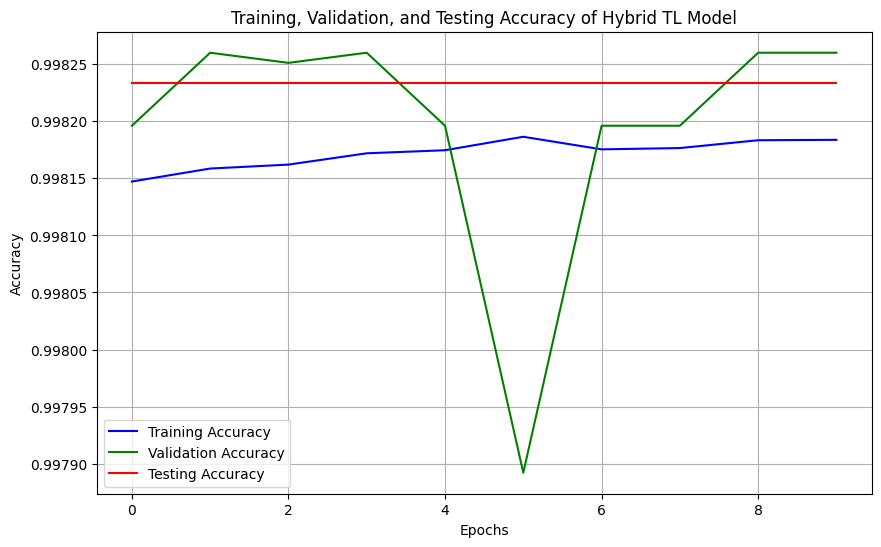

In [ ]:
# prompt: compare the training, testing and validation accuracy of Hybrid TL model in graph

# Extract accuracy values from the history object
train_accuracy = history.history['accuracy'][:10]  # Extract values for first 10 epochs
val_accuracy = history.history['val_accuracy'][:10]  # Extract values for first 10 epochs

# Evaluate the model on the test set to get test accuracy
_, test_accuracy = fuzzy_tl_model.evaluate(X_test, y_test, verbose=0)

# Create a list for test accuracy for each epoch (filled with the single test_accuracy value)
test_accuracy_list = [test_accuracy] * 10

# Create a list of epochs for the x-axis (from 0 to 9)
epochs = range(0, 10) # Changed from range(0, 11)

# Plot the accuracy curves with different colors
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')  # Blue for training
plt.plot(epochs, val_accuracy, 'g-', label='Validation Accuracy')  # Green for validation
plt.plot(epochs, test_accuracy_list, 'r-', label='Testing Accuracy')  # Red for testing
plt.title('Training, Validation, and Testing Accuracy of Hybrid TL Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Detection rate vs. Epochs of the hybrid TL model**

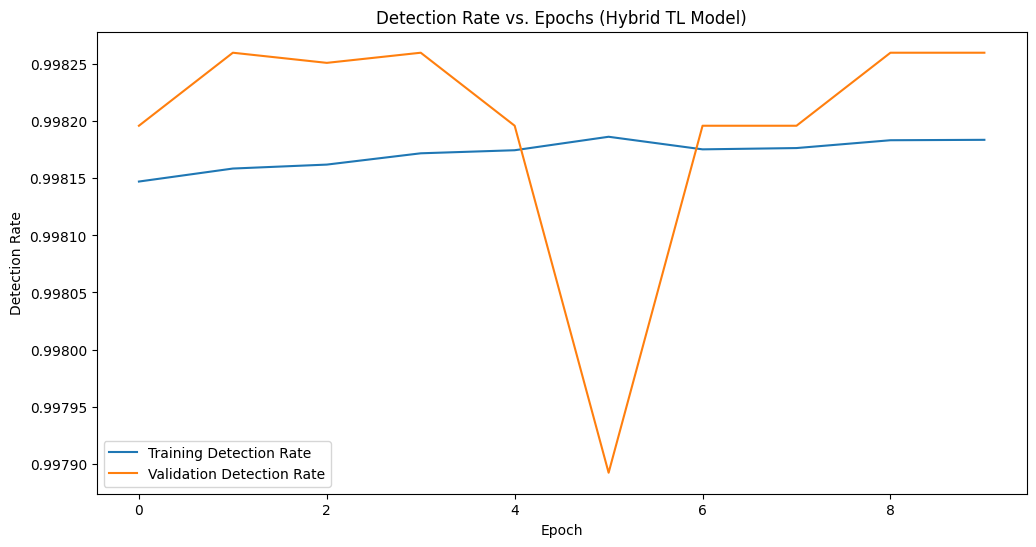

In [ ]:
# prompt: Detection rate vs. Epochs of the hybrid TL model

# Assuming 'history' is the training history of the hybrid TL model
# Plot detection rate (accuracy) vs. epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Detection Rate')
plt.plot(history.history['val_accuracy'], label='Validation Detection Rate')
plt.title('Detection Rate vs. Epochs (Hybrid TL Model)')
plt.xlabel('Epoch')
plt.ylabel('Detection Rate')
plt.legend()
plt.show()


**False alarm rate vs Epoch of the hybrid TL model**

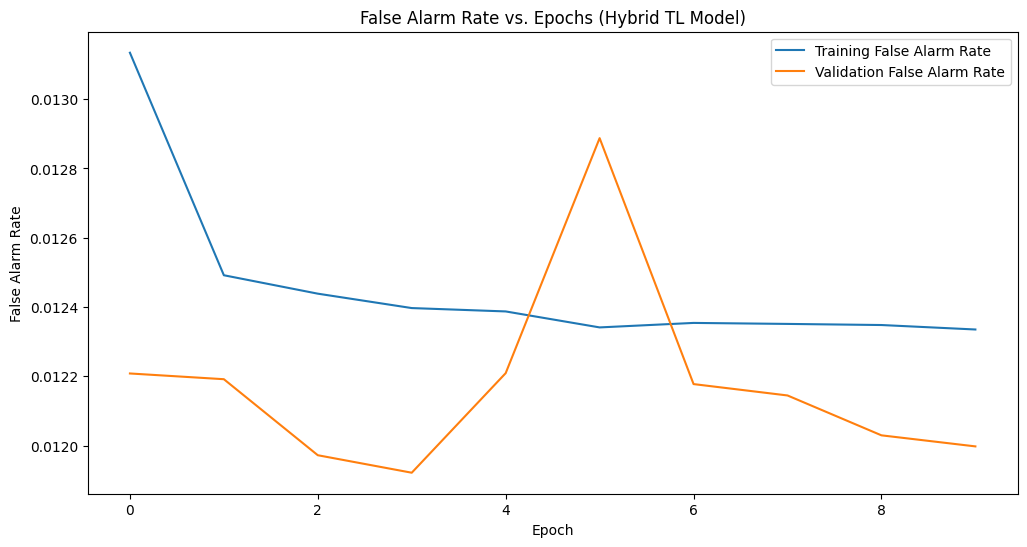

In [ ]:
# prompt: False alarm rate vs Epoch of the hybrid TL model

# Assuming 'history' is the training history of the hybrid TL model
# Plot false alarm rate (1 - specificity) vs. epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training False Alarm Rate')
plt.plot(history.history['val_loss'], label='Validation False Alarm Rate')
plt.title('False Alarm Rate vs. Epochs (Hybrid TL Model)')
plt.xlabel('Epoch')
plt.ylabel('False Alarm Rate')
plt.legend()
plt.show()


**ROC curve of the  hybrid TL model for fuzzy attack detection**

17583/17583 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step


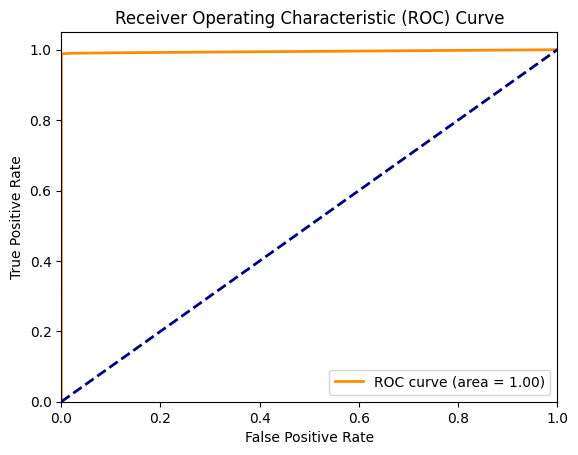

In [ ]:
# prompt: ROC curve of the  hybrid TL model for fuzzy attack detection

from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_prob = fuzzy_tl_model.predict(X_test)[:, 1]  # Assuming binary classification

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Results comparison with various models for fuzzy attack detection for car hacking dataset**

In [ ]:
# prompt: Evaluate the above hybrid TL model, hybrid CNN-LSTM model and RNNs model in single dataframe include the accuracy, precision, recall, f1-score,  ROC

# Evaluate Hybrid TL Model
y_pred_tl = fuzzy_tl_model.predict(X_test)
y_pred_classes_tl = np.argmax(y_pred_tl, axis=1)
fpr_tl, tpr_tl, _ = roc_curve(y_test_classes, y_pred_tl[:, 1])
roc_auc_tl = auc(fpr_tl, tpr_tl)
report_tl = classification_report(y_test_classes, y_pred_classes_tl, output_dict=True)

# Evaluate Hybrid CNN-LSTM Model (assuming 'model_cnn_lstm' is defined)
y_pred_cnn_lstm = fuzzy_cnn_lstm_model .predict(X_test)  # Assuming 'model' is the CNN-LSTM model
y_pred_classes_cnn_lstm = np.argmax(y_pred_cnn_lstm, axis=1)
fpr_cnn_lstm, tpr_cnn_lstm, _ = roc_curve(y_test_classes, y_pred_cnn_lstm[:, 1])
roc_auc_cnn_lstm = auc(fpr_cnn_lstm, tpr_cnn_lstm)
report_cnn_lstm = classification_report(y_test_classes, y_pred_classes_cnn_lstm, output_dict=True)

# Evaluate RNN Model (assuming 'model_rnn' is defined)
y_pred_rnn = fuzzy_rnn_model.predict(X_test)
y_pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)
fpr_rnn, tpr_rnn, _ = roc_curve(y_test_classes, y_pred_rnn[:, 1])
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)
report_rnn = classification_report(y_test_classes, y_pred_classes_rnn, output_dict=True)

# Create DataFrame for Comparison
results_df = pd.DataFrame({
    'Model': ['Hybrid TL', 'Hybrid CNN-LSTM', 'RNN'],
    'Accuracy': [report_tl['accuracy'], report_cnn_lstm['accuracy'], report_rnn['accuracy']],
    'Precision': [report_tl['weighted avg']['precision'], report_cnn_lstm['weighted avg']['precision'], report_rnn['weighted avg']['precision']],
    'Recall': [report_tl['weighted avg']['recall'], report_cnn_lstm['weighted avg']['recall'], report_rnn['weighted avg']['recall']],
    'F1-Score': [report_tl['weighted avg']['f1-score'], report_cnn_lstm['weighted avg']['f1-score'], report_rnn['weighted avg']['f1-score']],
    'ROC AUC': [roc_auc_tl, roc_auc_cnn_lstm, roc_auc_rnn]
})

print(results_df)


17583/17583 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step
17583/17583 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step
17583/17583 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step
             Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0        Hybrid TL  0.998233   0.998235  0.998233  0.998229  0.995122
1  Hybrid CNN-LSTM  0.998237   0.998240  0.998237  0.998232  0.995086
2              RNN  0.998237   0.998240  0.998237  0.998232  0.995079


#===============================================================

# RPM_Dataset

# Data Preprocessing

**Step 1: Data Collection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df1=pd.read_csv('/content/drive/MyDrive/RPM_dataset.csv')
# prompt: change coloum names with attributes Timestamp, CAN ID, DLC, DATA[0], DATA[1], DATA[2], DATA[3], DATA[4], DATA[5], DATA[6], DATA[7], Flag

df1.columns = ['Timestamp', 'CAN ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag']
df1

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478191e+09,018f,8,fe,3b,00,00,00,3c,00,00,R
1,1.478191e+09,0260,8,19,22,22,30,ff,8f,6e,3f,R
2,1.478191e+09,02a0,8,60,00,83,1d,96,02,bd,00,R
3,1.478191e+09,0329,8,dc,b8,7e,14,11,20,00,14,R
4,1.478191e+09,0545,8,d8,00,00,83,00,00,00,00,R
...,...,...,...,...,...,...,...,...,...,...,...,...
4621696,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
4621697,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
4621698,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
4621699,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


**step 2: Data Cleaning**\
 **---> Removal of duplicates**

In [ ]:
# Removing of duplicate values
df1.drop_duplicates(inplace=True)
# handling null values
df1.dropna(inplace=True)
df1

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478191e+09,018f,8,fe,3b,00,00,00,3c,00,00,R
1,1.478191e+09,0260,8,19,22,22,30,ff,8f,6e,3f,R
2,1.478191e+09,02a0,8,60,00,83,1d,96,02,bd,00,R
3,1.478191e+09,0329,8,dc,b8,7e,14,11,20,00,14,R
4,1.478191e+09,0545,8,d8,00,00,83,00,00,00,00,R
...,...,...,...,...,...,...,...,...,...,...,...,...
4621696,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
4621697,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
4621698,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
4621699,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


**step 3: Data Transfermation**\
 **----> Splitting data_field**

In [ ]:
# prompt: Splitting data_field

# Convert the column to string type before applying the split
df1['DATA[0]'] = df1['DATA[0]'].astype(str).apply(lambda x: x.split(' ')[0])
df1['DATA[1]'] = df1['DATA[1]'].astype(str).apply(lambda x: x.split(' ')[0])
df1['DATA[2]'] = df1['DATA[2]'].astype(str).apply(lambda x: x.split(' ')[0])
df1['DATA[3]'] = df1['DATA[3]'].astype(str).apply(lambda x: x.split(' ')[0])
df1['DATA[4]'] = df1['DATA[4]'].astype(str).apply(lambda x: x.split(' ')[0])
df1['DATA[5]'] = df1['DATA[5]'].astype(str).apply(lambda x: x.split(' ')[0])
df1['DATA[6]'] = df1['DATA[6]'].astype(str).apply(lambda x: x.split(' ')[0])
df1['DATA[7]'] = df1['DATA[7]'].astype(str).apply(lambda x: x.split(' ')[0])

**----> Changing non numerical coloums into numerical coloums**

In [ ]:
# prompt: change non numerical data coloums in numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['DATA[0]'] = le.fit_transform(df1['DATA[0]'])
df1['DATA[1]'] = le.fit_transform(df1['DATA[1]'])
df1['DATA[2]'] = le.fit_transform(df1['DATA[2]'])
df1['DATA[3]'] = le.fit_transform(df1['DATA[3]'])
df1['DATA[4]'] = le.fit_transform(df1['DATA[4]'])
df1['DATA[5]'] = le.fit_transform(df1['DATA[5]'])
df1['DATA[6]'] = le.fit_transform(df1['DATA[6]'])
df1['DATA[7]'] = le.fit_transform(df1['DATA[7]'])
df1['Flag'] = le.fit_transform(df1['Flag'])

**-----> Conversion of hexadecimal values**

In [ ]:
# prompt: convert all hexadecimal values into decimal values(int)

# Select columns containing hexadecimal values
hex_columns = ['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']

# Convert hexadecimal values to decimal, handling non-hex characters
for col in hex_columns:
  df1[col] = df1[col].apply(lambda x: int(str(x), 16) if isinstance(x, str) and all(c in '0123456789abcdefABCDEF' for c in x) else x)
  # The added condition 'all(c in '0123456789abcdefABCDEF' for c in x)' ensures that the string x contains only valid hexadecimal characters before attempting conversion.

df1

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478191e+09,399,8,111,11,0,0,0,60,0,0,0
1,1.478191e+09,608,8,25,4,11,7,191,143,49,63,0
2,1.478191e+09,672,8,63,0,41,5,131,2,78,0,0
3,1.478191e+09,809,8,95,76,38,4,17,32,0,20,0
4,1.478191e+09,1349,8,93,0,0,15,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4621696,1.478201e+09,399,8,111,41,0,0,0,65,0,0,0
4621697,1.478201e+09,608,8,24,3,10,7,8,143,48,25,0
4621698,1.478201e+09,672,8,36,0,60,5,132,2,78,0,0
4621699,1.478201e+09,809,8,95,75,39,4,17,32,0,20,0


**Step 4: Data Normalization**

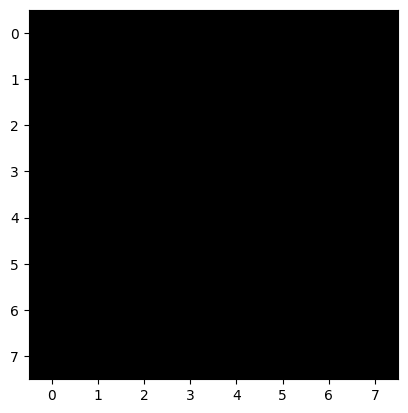

In [ ]:
import numpy as np

# Convert each row of the DataFrame to a 2D array of size 8x8
# Handle rows with unexpected length
images = []
for row in df1.values:
    try:
        # Attempt to reshape the row into an 8x8 array
        image = np.array(row[3:11], dtype=np.uint8).reshape(8, 8)
    except ValueError:
        # If reshaping fails, create an 8x8 array filled with zeros
        image = np.zeros((8, 8), dtype=np.uint8)
    images.append(image)

images = np.array(images)  # Convert the list of images to a NumPy array

# Plot the first image as an example
plt.imshow(images[0], cmap='gray')
plt.show()

**----> Feature Scaling**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reshape the images array to 2D
images_2D = images.reshape(images.shape[0], -1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 2D images data
scaler.fit(images_2D)

# Transform the 2D images data using the fitted scaler
scaled_images = scaler.transform(images_2D)

# Print the first 5 rows of the scaled data
print(scaled_images[0:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**----> Quantile Normalization**

In [ ]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer, StandardScaler

# Code to create the 'images' array should be added here.
# For example, if 'images' was created from a DataFrame 'df' as in
# the provided 'ipython-input-13-d13f7217e7bc' file, you would include that code here.

# Assuming 'images' is already defined from previous steps
# Reshape the images array to 2D
images_2D = images.reshape(images.shape[0], -1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 2D images data
scaler.fit(images_2D)

# Transform the 2D images data using the fitted scaler
scaled_images = scaler.transform(images_2D) # Calculate scaled_images

# Create a QuantileTransformer object
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Fit the transformer to the scaled images data
quantile_transformer.fit(scaled_images)

# Transform the scaled images data using the fitted transformer
normalized_images = quantile_transformer.transform(scaled_images)

# Print the first 5 rows of the normalized data
print(normalized_images[0:5])

[[-5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758]
 [-5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758

In [ ]:
from scipy.stats import rankdata
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample data - replace with your actual data
images = np.random.rand(100, 28, 28)

# Reshape the images array to 2D
images_2D = images.reshape(images.shape[0], -1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 2D images data
scaler.fit(images_2D)

# Transform the 2D images data using the fitted scaler
scaled_images = scaler.transform(images_2D) # Calculate scaled_images

# Convert the scaled data to ranks
ranked_data = rankdata(scaled_images)

# Apply quantile normalization to the ranked data
normalized_data = np.quantile(ranked_data, np.linspace(0, 1, len(ranked_data)))

# Print the first 5 rows of the normalized data
print(normalized_data[0:5])

[1. 2. 3. 4. 5.]


**Step 5: Image Generation**

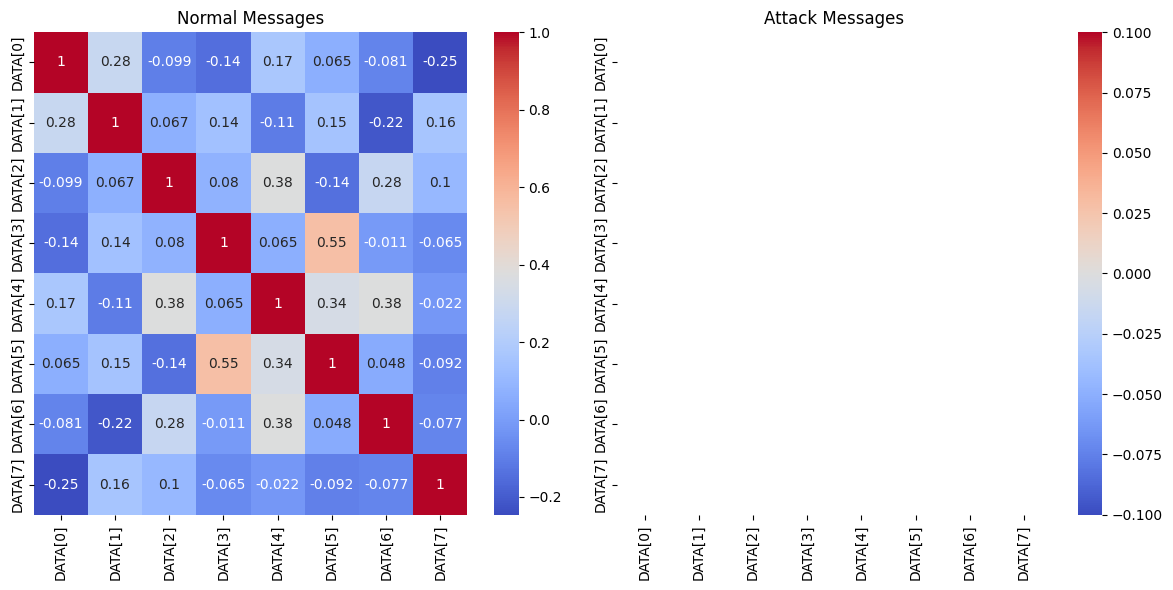

In [ ]:
# prompt: image generation for normal and attack message in colormap

# Separate normal and attack messages
normal_df1 = df1[df1['Flag'] == 0]
attack_df1 = df1[df1['Flag'] == 1]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Normal messages
sns.heatmap(normal_df1[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].corr(), annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Normal Messages')

# Attack messages
sns.heatmap(attack_df1[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].corr(), annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Attack Messages')

plt.tight_layout()
plt.show()


**Step 6: Label Encoding**

In [ ]:
# prompt: Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Flag' column
df1['Flag'] = label_encoder.fit_transform(df1['Flag'])
df1 = df1.drop('DLC', axis=1)
# Display the updated DataFrame
df1


,Timestamp,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478191e+09,399,111,11,0,0,0,60,0,0,0
1,1.478191e+09,608,25,4,11,7,191,143,49,63,0
2,1.478191e+09,672,63,0,41,5,131,2,78,0,0
3,1.478191e+09,809,95,76,38,4,17,32,0,20,0
4,1.478191e+09,1349,93,0,0,15,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4621696,1.478201e+09,399,111,41,0,0,0,65,0,0,0
4621697,1.478201e+09,608,24,3,10,7,8,143,48,25,0
4621698,1.478201e+09,672,36,0,60,5,132,2,78,0,0
4621699,1.478201e+09,809,95,75,39,4,17,32,0,20,0


***Step 7: Anomaly Detection Specific Features***

In [ ]:
# prompt: Anomaly Detection Specific Features
#  Enhance the model’s ability to detect anomalies by adding derived features.

# Calculate the difference between consecutive timestamps
df1['Timestamp_diff'] = df1['Timestamp'].diff()

# Calculate the difference between consecutive CAN IDs
df1['CAN_ID_diff'] = df1['CAN ID'].diff()

# Calculate the sum of the payload values
df1['Payload_sum'] = df1[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].sum(axis=1)

# Calculate the standard deviation of the payload values
df1['Payload_std'] = df1[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].std(axis=1)

# Display the updated DataFrame
df1


,Timestamp,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag,Timestamp_diff,CAN_ID_diff,Payload_sum,Payload_std
0,1.478191e+09,399,111,11,0,0,0,60,0,0,0,NaN,NaN,182,41.233655
1,1.478191e+09,608,25,4,11,7,191,143,49,63,0,0.000227,209.0,493,69.415802
2,1.478191e+09,672,63,0,41,5,131,2,78,0,0,0.000235,64.0,320,47.994047
3,1.478191e+09,809,95,76,38,4,17,32,0,20,0,0.000228,137.0,282,33.876878
4,1.478191e+09,1349,93,0,0,15,0,0,0,0,0,0.000245,540.0,108,32.548864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621696,1.478201e+09,399,111,41,0,0,0,65,0,0,0,0.000225,-391.0,217,41.987881
4621697,1.478201e+09,608,24,3,10,7,8,143,48,25,0,0.000230,209.0,268,46.595524
4621698,1.478201e+09,672,36,0,60,5,132,2,78,0,0,0.000234,64.0,313,48.087532
4621699,1.478201e+09,809,95,75,39,4,17,32,0,20,0,0.000232,137.0,282,33.720490


**Step 8: Feature Selection**

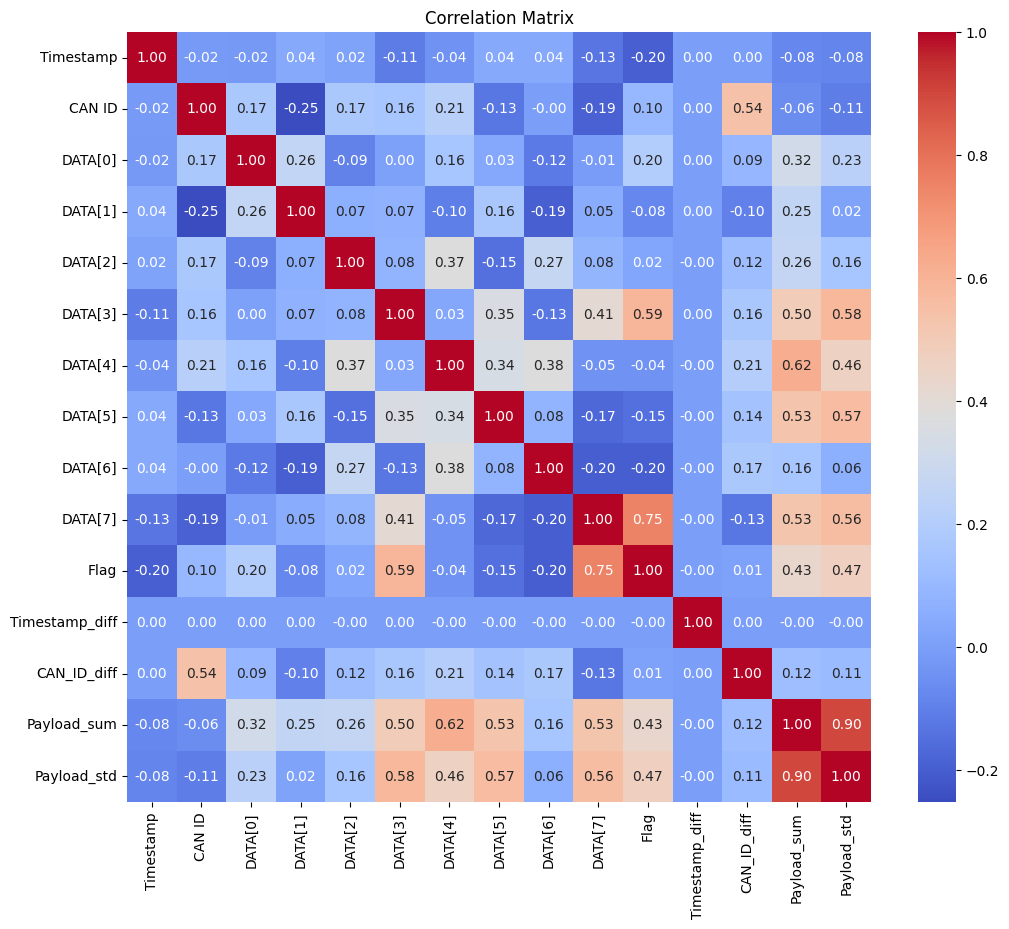

Relevant features: ['Timestamp', 'DATA[0]', 'DATA[3]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag', 'Payload_sum', 'Payload_std']


In [ ]:
# prompt: Feature Selection

# Feature Selection

# Correlation Matrix
correlation_matrix = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Select features based on correlation with the target variable
# Example: Select features with correlation above a threshold
threshold = 0.1
relevant_features = correlation_matrix['Flag'][abs(correlation_matrix['Flag']) > threshold].index.tolist()
print("Relevant features:", relevant_features)

# You can also use other feature selection techniques like:
# - Recursive Feature Elimination (RFE)
# - SelectKBest
# - Feature Importance from Tree-based models


**Step 9: Extracting and splitting data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Extract the CAN ID and Flag columns
X = df1['CAN ID'].astype(str).values  # Convert CAN ID to strings
y = df1['Flag'].values

# Tokenize the CAN messages
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)  # Now X contains strings
X_seq = tokenizer.texts_to_sequences(X)

# ... rest of the code

# Pad the sequences to ensure uniform input size
max_len = max(len(x) for x in X_seq)
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post')

# Reshape data to fit the CNN input format (samples, timesteps, features)
X_padded = X_padded.reshape(X_padded.shape[0], X_padded.shape[1], 1)

# Convert target to categorical
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes of the datasets to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3206157, 1, 1)
X_val shape: (687034, 1, 1)
X_test shape: (687034, 1, 1)
y_train shape: (3206157, 2)
y_val shape: (687034, 2)
y_test shape: (687034, 2)


# Building Models

**1.Model Architecture for hybrid CNN-LSTM model**

In [ ]:
# prompt: stop overfitting model and build new hybrid CNN-LSTM model
from tensorflow.keras.layers import Input, BatchNormalization, Reshape  # Import Input, BatchNormalization, and Reshape

# Define the input
input_layer = Input(shape=(X_train.shape[1], 1))

# Add 1D CNN layers with Batch Normalization
cnn_out = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
cnn_out = BatchNormalization()(cnn_out)  # Add Batch Normalization after Conv1D
cnn_out = Conv1D(64, 3, activation='relu', padding='same')(cnn_out)
cnn_out = BatchNormalization()(cnn_out)  # Add Batch Normalization after Conv1D
cnn_out = MaxPooling1D(pool_size=1)(cnn_out)

# Flatten the output from the CNN layers
cnn_out = Flatten()(cnn_out)

# Add LSTM layers
lstm_out = Reshape((1, -1))(cnn_out)
lstm_out = LSTM(50, return_sequences=True)(lstm_out)
lstm_out = LSTM(50)(lstm_out)

# Add fully connected layers with L2 regularization
dense_out = Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(lstm_out)
dense_out = Dropout(0.5)(dense_out)

# Handle NaN values and convert 'y' to a consistent type (e.g., string)
y_processed = np.where(pd.isna(y), 'NaN', y).astype(str)  # Replace NaNs with 'NaN' string and convert to string type

# Now calculate unique classes
num_classes = len(np.unique(y_processed))
output_layer = Dense(num_classes, activation='softmax')(dense_out)

# Create the model
from tensorflow.keras.models import Model # Import the Model class
rpm_cnn_lstm_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
rpm_cnn_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Display model summary
rpm_cnn_lstm_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1, 50)               │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,572 (205.36 KB)

 Trainable params: 52,380 (204.61 KB)

 Non-trainable params: 192 (768.00 B)

**Train Hybrid CNN-LSTM model**

In [ ]:
# prompt: Encoding the target labels and train Hybrid CNN-LSTM model

# Assuming 'Flag' column has two unique values and is already one-hot encoded
y_train_encoded = np.argmax(y_train, axis=1)
y_val_encoded = np.argmax(y_val, axis=1)

# The rest of the code remains the same
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Change the file extension to '.keras'
model_checkpoint = ModelCheckpoint('rpm_cnn_lstm.keras', monitor='val_accuracy', save_best_only=True)

history = rpm_cnn_lstm_model.fit(
    X_train, y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val_categorical),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
25049/25049 ━━━━━━━━━━━━━━━━━━━━ 171s 7ms/step - accuracy: 0.9466 - loss: 0.1334 - val_accuracy: 0.9526 - val_loss: 0.1077
Epoch 2/10
25049/25049 ━━━━━━━━━━━━━━━━━━━━ 179s 7ms/step - accuracy: 0.9507 - loss: 0.1112 - val_accuracy: 0.9526 - val_loss: 0.1083
Epoch 3/10
25049/25049 ━━━━━━━━━━━━━━━━━━━━ 189s 7ms/step - accuracy: 0.9510 - loss: 0.1115 - val_accuracy: 0.9526 - val_loss: 0.1093
Epoch 4/10
25049/25049 ━━━━━━━━━━━━━━━━━━━━ 209s 7ms/step - accuracy: 0.9494 - loss: 0.1134 - val_accuracy: 0.9526 - val_loss: 0.1076
Epoch 5/10
25049/25049 ━━━━━━━━━━━━━━━━━━━━ 195s 7ms/step - accuracy: 0.9367 - loss: 0.1285 - val_accuracy: 0.9526 - val_loss: 0.1087
Epoch 6/10
25049/25049 ━━━━━━━━━━━━━━━━━━━━ 203s 7ms/step - accuracy: 0.9390 - loss: 0.1264 - val_accuracy: 0.9526 - val_loss: 0.1084
Epoch 7/10
25049/25049 ━━━━━━━━━━━━━━━━━━━━ 172s 7ms/step - accuracy: 0.9336 - loss: 0.1333 - val_accuracy: 0.9526 - val_loss: 0.1106
Epoch 8/10
25049/25049 ━━━━━━━━━━━━━━━━━━━━ 169s 7ms/step - ac

**Evaluate the hybrid CNN LSTM model**

Test Loss: 0.1068
Test Accuracy: 0.9531
21470/21470 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    588867
           1       0.75      1.00      0.86     98167

    accuracy                           0.95    687034
   macro avg       0.88      0.97      0.92    687034
weighted avg       0.96      0.95      0.96    687034



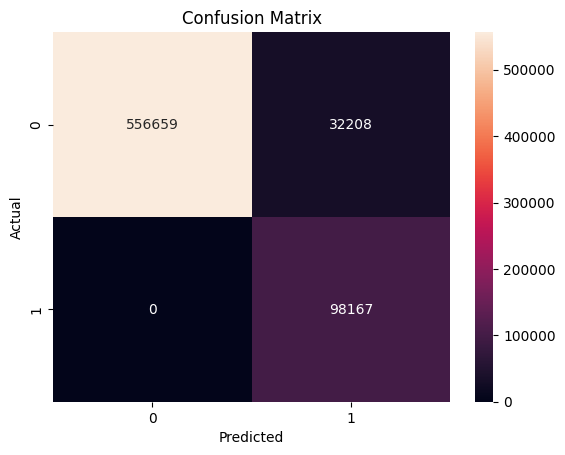

In [ ]:
# prompt: Evaluate the hybrid CNN-LSTM model

# Evaluate the model on the test set
loss, accuracy = rpm_cnn_lstm_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = rpm_cnn_lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Training and validation accuracy/loss vs. epochs of the Hybrid CNN-LSTM Model**

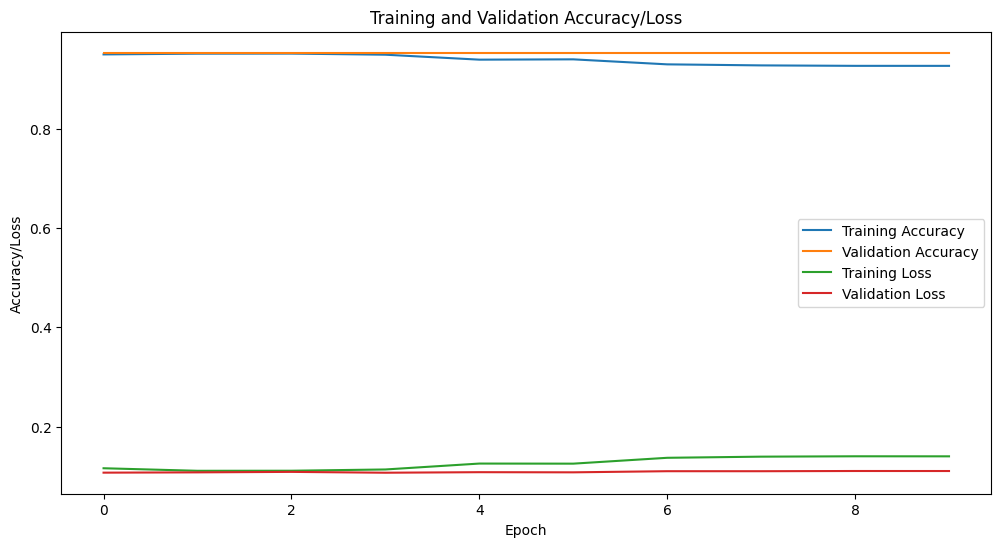

In [ ]:
# prompt: Training and validation accuracy/loss vs. epochs of the Hybrid CNN-LSTM Model in single graph

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


**2. Model Architecture for hybrid TL model**

In [ ]:
# prompt: build a hybrid TL model

from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Reshape
from tensorflow.keras.models import Model

# Define the input
input_layer = Input(shape=(X_train.shape[1], 1))

# Add 1D CNN layers
cnn_out = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
cnn_out = Conv1D(64, 3, activation='relu', padding='same')(cnn_out)
cnn_out = MaxPooling1D(pool_size=1)(cnn_out)

# Flatten the output from the CNN layers
cnn_out = Flatten()(cnn_out)

# Add fully connected layers
dense_out = Dense(50, activation='relu')(cnn_out)
dense_out = Dropout(0.5)(dense_out)

# Handle NaN values and convert 'y' to a consistent type (e.g., string)
y_processed = np.where(pd.isna(y), 'NaN', y).astype(str)  # Replace NaNs with 'NaN' string and convert to string type

# Now calculate unique classes
num_classes = len(np.unique(y_processed))
output_layer = Dense(num_classes, activation='softmax')(dense_out)

# Create the model
rpm_tl_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
rpm_tl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
rpm_tl_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,688 (37.84 KB)

 Trainable params: 9,688 (37.84 KB)

 Non-trainable params: 0 (0.00 B)

**Training Hybrid TL Model**

In [ ]:
# prompt: train the above hybrid TL model

# Assuming 'Flag' column has two unique values and is already one-hot encoded
y_train_encoded = np.argmax(y_train, axis=1)
y_val_encoded = np.argmax(y_val, axis=1)

# The rest of the code remains the same
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Change the file extension to '.keras'
model_checkpoint = ModelCheckpoint('rpm_tl.keras', monitor='val_accuracy', save_best_only=True)

history = rpm_tl_model.fit(
    X_train, y_train_categorical,
    epochs=10,
    batch_size=256,
    validation_data=(X_val, y_val_categorical),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10
12525/12525 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9440 - loss: 0.1212 - val_accuracy: 0.9526 - val_loss: 0.1070
Epoch 2/10
12525/12525 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9525 - loss: 0.1070 - val_accuracy: 0.9526 - val_loss: 0.1070
Epoch 3/10
12525/12525 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.9526 - loss: 0.1068 - val_accuracy: 0.9526 - val_loss: 0.1070
Epoch 4/10
12525/12525 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9529 - loss: 0.1065 - val_accuracy: 0.9526 - val_loss: 0.1070
Epoch 5/10
12525/12525 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9526 - loss: 0.1069 - val_accuracy: 0.9526 - val_loss: 0.1070
Epoch 6/10
12525/12525 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.9528 - loss: 0.1066 - val_accuracy: 0.9526 - val_loss: 0.1070
Epoch 7/10
12525/12525 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.9528 - loss: 0.1066 - val_accuracy: 0.9526 - val_loss: 0.1070
Epoch 8/10
12525/12525 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 

**Evaluate the hybrid TL model**

Test Loss: 0.1061
Test Accuracy: 0.9531
21470/21470 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    588867
           1       0.75      1.00      0.86     98167

    accuracy                           0.95    687034
   macro avg       0.88      0.97      0.92    687034
weighted avg       0.96      0.95      0.96    687034



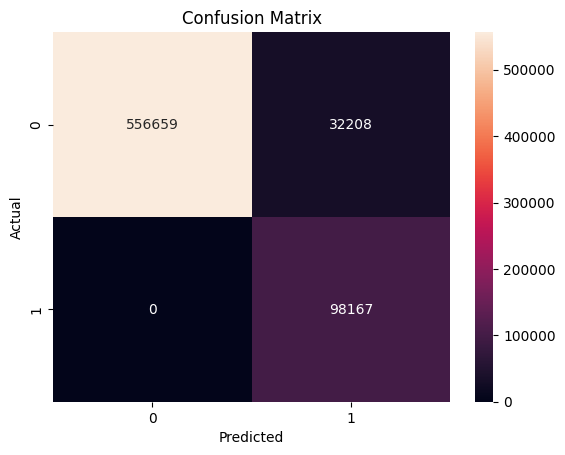

In [ ]:
# prompt: Evaluate the hybrid TL model

# Evaluate the model on the test set
loss, accuracy = rpm_tl_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = rpm_tl_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Training and validation accuracy/loss vs. epochs of the Hybrid TL Model**

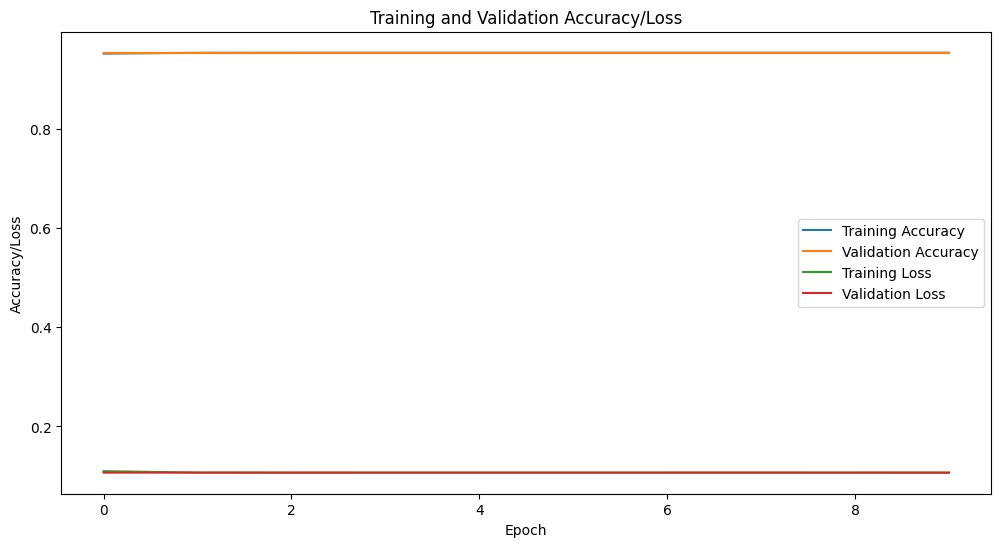

In [ ]:
# **Training and validation accuracy/loss vs. epochs of the Hybrid TL Model**

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

**3. Random Forest**

In [ ]:
# prompt: build random forest and train, evaluate

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Flatten the input data for Random Forest
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convert one-hot encoded labels to class indices
y_train_classes = np.argmax(y_train, axis=1)
y_val_classes = np.argmax(y_val, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_flat, y_train_classes)

# Make predictions on the validation set
y_pred_val = rf_model.predict(X_val_flat)

# Evaluate the model on the validation set
print("Validation Accuracy:", accuracy_score(y_val_classes, y_pred_val))
print(classification_report(y_val_classes, y_pred_val))
print("Confusion Matrix:\n", confusion_matrix(y_val_classes, y_pred_val))

# Make predictions on the test set
y_pred_test = rf_model.predict(X_test_flat)

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test_classes, y_pred_test))
print(classification_report(y_test_classes, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_test))


Validation Accuracy: 0.9525598441998504
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    588652
           1       0.75      1.00      0.86     98382

    accuracy                           0.95    687034
   macro avg       0.88      0.97      0.91    687034
weighted avg       0.96      0.95      0.96    687034

Confusion Matrix:
 [[556059  32593]
 [     0  98382]]
Test Accuracy: 0.9531202240354917
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    588867
           1       0.75      1.00      0.86     98167

    accuracy                           0.95    687034
   macro avg       0.88      0.97      0.92    687034
weighted avg       0.96      0.95      0.96    687034

Confusion Matrix:
 [[556659  32208]
 [     0  98167]]


**Detection rate vs. Epochs of the hybrid TL model**

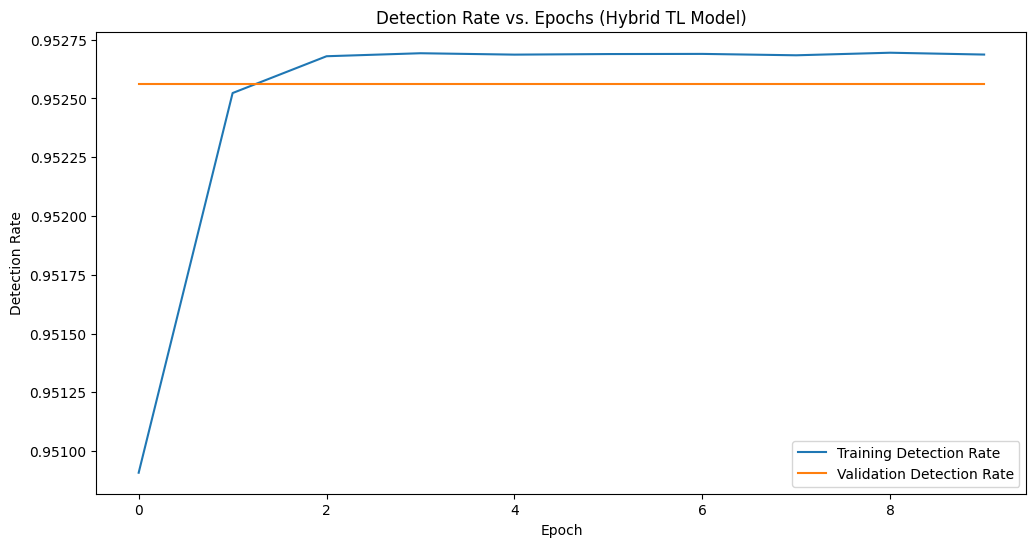

In [ ]:
# prompt: Detection rate vs. Epochs of the hybrid TL model

# Assuming 'history' is the training history of the hybrid TL model
# Plot detection rate (accuracy) vs. epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Detection Rate')
plt.plot(history.history['val_accuracy'], label='Validation Detection Rate')
plt.title('Detection Rate vs. Epochs (Hybrid TL Model)')
plt.xlabel('Epoch')
plt.ylabel('Detection Rate')
plt.legend()
plt.show()


**False alarm rate vs Epoch of the hybrid TL model**

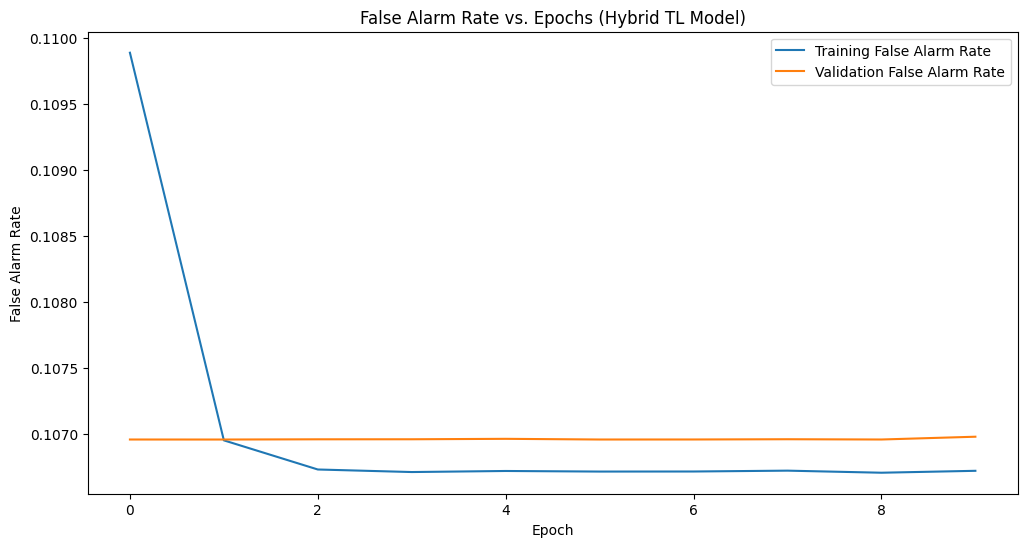

In [ ]:
# prompt: False alarm rate vs Epoch of the hybrid TL model

# Assuming 'history' is the training history of the hybrid TL model
# Plot false alarm rate (1 - specificity) vs. epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training False Alarm Rate')
plt.plot(history.history['val_loss'], label='Validation False Alarm Rate')
plt.title('False Alarm Rate vs. Epochs (Hybrid TL Model)')
plt.xlabel('Epoch')
plt.ylabel('False Alarm Rate')
plt.legend()
plt.show()


**ROC curve of the  hybrid TL model for fuzzy attack detection**

21470/21470 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step


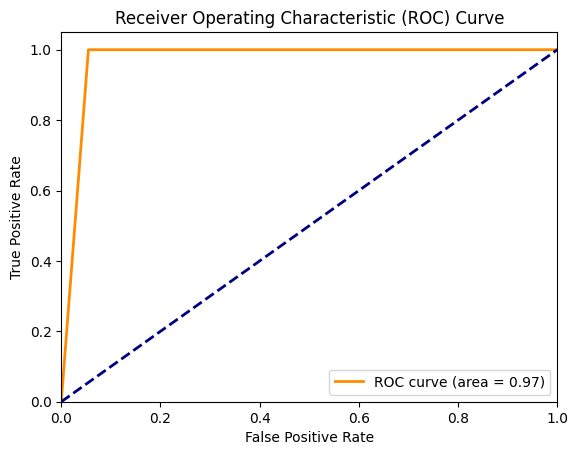

In [ ]:
# prompt: ROC curve of the  hybrid TL model for fuzzy attack detection

from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_prob = rpm_tl_model.predict(X_test)[:, 1]  # Assuming binary classification

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# prompt:  Evaluate the above hybrid TL model, hybrid CNN-LSTM model and random forest model in single dataframe

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the hybrid TL model
y_pred_tl = rpm_tl_model.predict(X_test)
y_pred_tl_classes = np.argmax(y_pred_tl, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

tl_accuracy = accuracy_score(y_test_classes, y_pred_tl_classes)
tl_precision = precision_score(y_test_classes, y_pred_tl_classes)
tl_recall = recall_score(y_test_classes, y_pred_tl_classes)
tl_f1 = f1_score(y_test_classes, y_pred_tl_classes)

# Evaluate the hybrid CNN-LSTM model
y_pred_cnn_lstm = rpm_cnn_lstm_model.predict(X_test)
y_pred_cnn_lstm_classes = np.argmax(y_pred_cnn_lstm, axis=1)

cnn_lstm_accuracy = accuracy_score(y_test_classes, y_pred_cnn_lstm_classes)
cnn_lstm_precision = precision_score(y_test_classes, y_pred_cnn_lstm_classes)
cnn_lstm_recall = recall_score(y_test_classes, y_pred_cnn_lstm_classes)
cnn_lstm_f1 = f1_score(y_test_classes, y_pred_cnn_lstm_classes)

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test_flat)

rf_accuracy = accuracy_score(y_test_classes, y_pred_rf)
rf_precision = precision_score(y_test_classes, y_pred_rf)
rf_recall = recall_score(y_test_classes, y_pred_rf)
rf_f1 = f1_score(y_test_classes, y_pred_rf)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Hybrid TL', 'Hybrid CNN-LSTM', 'Random Forest'],
    'Accuracy': [tl_accuracy, cnn_lstm_accuracy, rf_accuracy],
    'Precision': [tl_precision, cnn_lstm_precision, rf_precision],
    'Recall': [tl_recall, cnn_lstm_recall, rf_recall],
    'F1-Score': [tl_f1, cnn_lstm_f1, rf_f1]
})

# Display the results
print(results_df)


21470/21470 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step
21470/21470 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step
             Model  Accuracy  Precision  Recall  F1-Score
0        Hybrid TL   0.95312   0.752959     1.0  0.859072
1  Hybrid CNN-LSTM   0.95312   0.752959     1.0  0.859072
2    Random Forest   0.95312   0.752959     1.0  0.859072


#======================================================

# Gear_Attack

# Data Preprocessing

**Step 1: Data Collection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df2=pd.read_csv('/content/drive/MyDrive/gear_dataset.csv')
# prompt: change coloum names with attributes Timestamp, CAN ID, DLC, DATA[0], DATA[1], DATA[2], DATA[3], DATA[4], DATA[5], DATA[6], DATA[7], Flag

df2.columns = ['Timestamp', 'CAN ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag']
df2

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478193e+09,02c0,8,15,00,00,00,00,00,00,00,R
1,1.478193e+09,0350,8,05,20,44,68,77,00,00,7e,R
2,1.478193e+09,0370,8,00,20,00,00,00,00,00,00,R
3,1.478193e+09,043f,8,10,40,60,ff,78,c4,08,00,R
4,1.478193e+09,0440,8,ff,00,00,00,ff,c4,08,00,R
...,...,...,...,...,...,...,...,...,...,...,...,...
4443136,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
4443137,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
4443138,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
4443139,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


**step 2: Data Cleaning**\
 **---> Removal of duplicates**

In [ ]:
# Removing of duplicate values
df2.drop_duplicates(inplace=True)
# handling null values
df2.dropna(inplace=True)
df2

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478193e+09,02c0,8,15,00,00,00,00,00,00,00,R
1,1.478193e+09,0350,8,05,20,44,68,77,00,00,7e,R
2,1.478193e+09,0370,8,00,20,00,00,00,00,00,00,R
3,1.478193e+09,043f,8,10,40,60,ff,78,c4,08,00,R
4,1.478193e+09,0440,8,ff,00,00,00,ff,c4,08,00,R
...,...,...,...,...,...,...,...,...,...,...,...,...
4443136,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
4443137,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
4443138,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
4443139,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


**step 3: Data Transfermation**\
 **----> Splitting data_field**

In [ ]:
# prompt: Splitting data_field

# Convert the column to string type before applying the split
df2['DATA[0]'] = df2['DATA[0]'].astype(str).apply(lambda x: x.split(' ')[0])
df2['DATA[1]'] = df2['DATA[1]'].astype(str).apply(lambda x: x.split(' ')[0])
df2['DATA[2]'] = df2['DATA[2]'].astype(str).apply(lambda x: x.split(' ')[0])
df2['DATA[3]'] = df2['DATA[3]'].astype(str).apply(lambda x: x.split(' ')[0])
df2['DATA[4]'] = df2['DATA[4]'].astype(str).apply(lambda x: x.split(' ')[0])
df2['DATA[5]'] = df2['DATA[5]'].astype(str).apply(lambda x: x.split(' ')[0])
df2['DATA[6]'] = df2['DATA[6]'].astype(str).apply(lambda x: x.split(' ')[0])
df2['DATA[7]'] = df2['DATA[7]'].astype(str).apply(lambda x: x.split(' ')[0])

**----> Changing non numerical coloums into numerical coloums**

In [ ]:
# prompt: change non numerical data coloums in numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['DATA[0]'] = le.fit_transform(df2['DATA[0]'])
df2['DATA[1]'] = le.fit_transform(df2['DATA[1]'])
df2['DATA[2]'] = le.fit_transform(df2['DATA[2]'])
df2['DATA[3]'] = le.fit_transform(df2['DATA[3]'])
df2['DATA[4]'] = le.fit_transform(df2['DATA[4]'])
df2['DATA[5]'] = le.fit_transform(df2['DATA[5]'])
df2['DATA[6]'] = le.fit_transform(df2['DATA[6]'])
df2['DATA[7]'] = le.fit_transform(df2['DATA[7]'])
df2['Flag'] = le.fit_transform(df2['Flag'])

**-----> Conversion of hexadecimal values**

In [ ]:
# prompt: convert all hexadecimal values into decimal values(int)

# Select columns containing hexadecimal values
hex_columns = ['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']

# Convert hexadecimal values to decimal, handling non-hex characters
for col in hex_columns:
  df2[col] = df2[col].apply(lambda x: int(str(x), 16) if isinstance(x, str) and all(c in '0123456789abcdefABCDEF' for c in x) else x)
  # The added condition 'all(c in '0123456789abcdefABCDEF' for c in x)' ensures that the string x contains only valid hexadecimal characters before attempting conversion.

df2

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478193e+09,704,8,21,0,0,0,0,0,0,0,0
1,1.478193e+09,848,8,5,13,43,14,119,0,0,126,0
2,1.478193e+09,880,8,0,13,0,0,0,0,0,0,0
3,1.478193e+09,1087,8,16,38,50,35,120,196,8,0,0
4,1.478193e+09,1088,8,149,0,0,0,220,196,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4443136,1.478201e+09,399,8,148,62,0,0,0,65,0,0,0
4443137,1.478201e+09,608,8,24,14,20,13,8,143,69,25,0
4443138,1.478201e+09,672,8,36,0,69,11,142,2,105,0,0
4443139,1.478201e+09,809,8,131,120,58,9,17,32,0,20,0


**Step 4: Data Normalization**

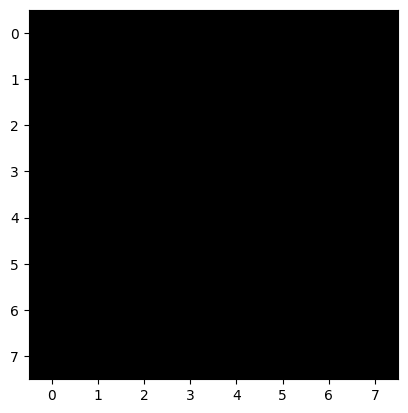

In [ ]:
import numpy as np

# Convert each row of the DataFrame to a 2D array of size 8x8
# Handle rows with unexpected length
images = []
for row in df2.values:
    try:
        # Attempt to reshape the row into an 8x8 array
        image = np.array(row[3:11], dtype=np.uint8).reshape(8, 8)
    except ValueError:
        # If reshaping fails, create an 8x8 array filled with zeros
        image = np.zeros((8, 8), dtype=np.uint8)
    images.append(image)

images = np.array(images)  # Convert the list of images to a NumPy array

# Plot the first image as an example
plt.imshow(images[0], cmap='gray')
plt.show()

**----> Feature Scaling**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reshape the images array to 2D
images_2D = images.reshape(images.shape[0], -1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 2D images data
scaler.fit(images_2D)

# Transform the 2D images data using the fitted scaler
scaled_images = scaler.transform(images_2D)

# Print the first 5 rows of the scaled data
print(scaled_images[0:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**----> Quantile Normalization**

In [ ]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer, StandardScaler

# Code to create the 'images' array should be added here.
# For example, if 'images' was created from a DataFrame 'df' as in
# the provided 'ipython-input-13-d13f7217e7bc' file, you would include that code here.

# Assuming 'images' is already defined from previous steps
# Reshape the images array to 2D
images_2D = images.reshape(images.shape[0], -1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 2D images data
scaler.fit(images_2D)

# Transform the 2D images data using the fitted scaler
scaled_images = scaler.transform(images_2D) # Calculate scaled_images

# Create a QuantileTransformer object
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Fit the transformer to the scaled images data
quantile_transformer.fit(scaled_images)

# Transform the scaled images data using the fitted transformer
normalized_images = quantile_transformer.transform(scaled_images)

# Print the first 5 rows of the normalized data
print(normalized_images[0:5])

[[-5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758]
 [-5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758

In [ ]:
from scipy.stats import rankdata
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample data - replace with your actual data
images = np.random.rand(100, 28, 28)

# Reshape the images array to 2D
images_2D = images.reshape(images.shape[0], -1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 2D images data
scaler.fit(images_2D)

# Transform the 2D images data using the fitted scaler
scaled_images = scaler.transform(images_2D) # Calculate scaled_images

# Convert the scaled data to ranks
ranked_data = rankdata(scaled_images)

# Apply quantile normalization to the ranked data
normalized_data = np.quantile(ranked_data, np.linspace(0, 1, len(ranked_data)))

# Print the first 5 rows of the normalized data
print(normalized_data[0:5])

[1. 2. 3. 4. 5.]


**Step 5: Image Generation**

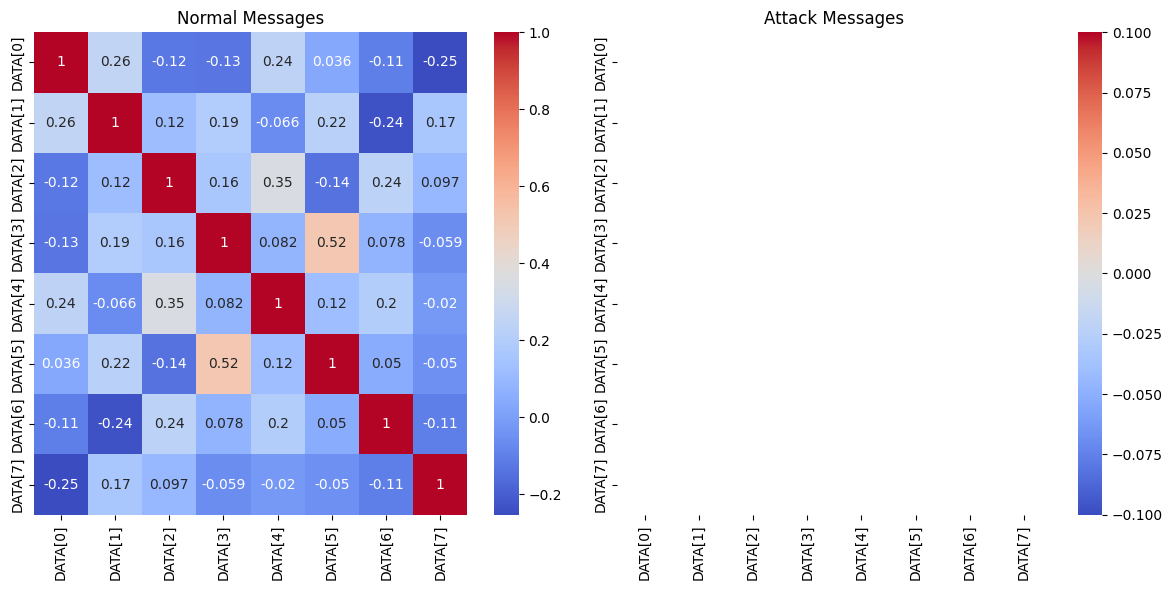

In [ ]:
# prompt: image generation for normal and attack message in colormap

# Separate normal and attack messages
normal_df2 = df2[df2['Flag'] == 0]
attack_df2 = df2[df2['Flag'] == 1]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Normal messages
sns.heatmap(normal_df2[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].corr(), annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Normal Messages')

# Attack messages
sns.heatmap(attack_df2[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].corr(), annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Attack Messages')

plt.tight_layout()
plt.show()


**Step 6: Label Encoding**

In [ ]:
# prompt: Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Flag' column
df2['Flag'] = label_encoder.fit_transform(df2['Flag'])
df2 = df2.drop('DLC', axis=1)
# Display the updated DataFrame
df2


,Timestamp,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478193e+09,704,21,0,0,0,0,0,0,0,0
1,1.478193e+09,848,5,13,43,14,119,0,0,126,0
2,1.478193e+09,880,0,13,0,0,0,0,0,0,0
3,1.478193e+09,1087,16,38,50,35,120,196,8,0,0
4,1.478193e+09,1088,149,0,0,0,220,196,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4443136,1.478201e+09,399,148,62,0,0,0,65,0,0,0
4443137,1.478201e+09,608,24,14,20,13,8,143,69,25,0
4443138,1.478201e+09,672,36,0,69,11,142,2,105,0,0
4443139,1.478201e+09,809,131,120,58,9,17,32,0,20,0


***Step 7: Anomaly Detection Specific Features***

In [ ]:
# prompt: Anomaly Detection Specific Features
#  Enhance the model’s ability to detect anomalies by adding derived features.

# Calculate the difference between consecutive timestamps
df2['Timestamp_diff'] = df2['Timestamp'].diff()

# Calculate the difference between consecutive CAN IDs
df2['CAN_ID_diff'] = df2['CAN ID'].diff()

# Calculate the sum of the payload values
df2['Payload_sum'] = df2[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].sum(axis=1)

# Calculate the standard deviation of the payload values
df2['Payload_std'] = df2[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].std(axis=1)

# Display the updated DataFrame
df2


,Timestamp,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag,Timestamp_diff,CAN_ID_diff,Payload_sum,Payload_std
0,1.478193e+09,704,21,0,0,0,0,0,0,0,0,NaN,NaN,21,7.424621
1,1.478193e+09,848,5,13,43,14,119,0,0,126,0,0.000241,144.0,320,52.747376
2,1.478193e+09,880,0,13,0,0,0,0,0,0,0,0.000246,32.0,13,4.596194
3,1.478193e+09,1087,16,38,50,35,120,196,8,0,0,0.000238,207.0,463,67.091489
4,1.478193e+09,1088,149,0,0,0,220,196,8,0,0,0.000244,1.0,573,98.589970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4443136,1.478201e+09,399,148,62,0,0,0,65,0,0,0,0.000225,-391.0,275,54.142504
4443137,1.478201e+09,608,24,14,20,13,8,143,69,25,0,0.000230,209.0,316,45.916073
4443138,1.478201e+09,672,36,0,69,11,142,2,105,0,0,0.000234,64.0,365,54.403092
4443139,1.478201e+09,809,131,120,58,9,17,32,0,20,0,0.000232,137.0,387,50.706262


**Step 8: Feature Selection**

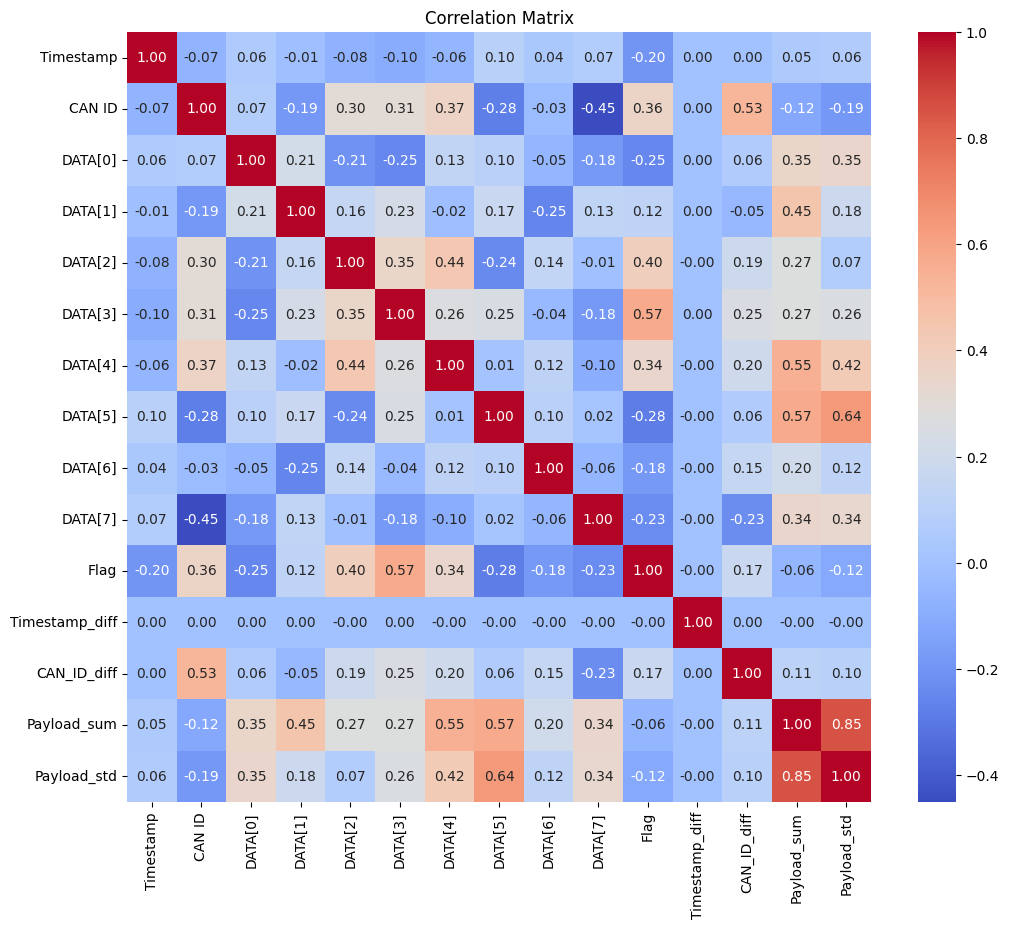

Relevant features: ['Timestamp', 'CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag', 'CAN_ID_diff', 'Payload_std']


In [ ]:
# prompt: Feature Selection

# Feature Selection

# Correlation Matrix
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Select features based on correlation with the target variable
# Example: Select features with correlation above a threshold
threshold = 0.1
relevant_features = correlation_matrix['Flag'][abs(correlation_matrix['Flag']) > threshold].index.tolist()
print("Relevant features:", relevant_features)

# You can also use other feature selection techniques like:
# - Recursive Feature Elimination (RFE)
# - SelectKBest
# - Feature Importance from Tree-based models


**Step 9: Extracting and splitting data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Extract the CAN ID and Flag columns
X = df2['CAN ID'].astype(str).values  # Convert CAN ID to strings
y = df2['Flag'].values

# Tokenize the CAN messages
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)  # Now X contains strings
X_seq = tokenizer.texts_to_sequences(X)

# ... rest of the code

# Pad the sequences to ensure uniform input size
max_len = max(len(x) for x in X_seq)
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post')

# Reshape data to fit the CNN input format (samples, timesteps, features)
X_padded = X_padded.reshape(X_padded.shape[0], X_padded.shape[1], 1)

# Convert target to categorical
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes of the datasets to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3082083, 1, 1)
X_val shape: (660446, 1, 1)
X_test shape: (660447, 1, 1)
y_train shape: (3082083, 2)
y_val shape: (660446, 2)
y_test shape: (660447, 2)


# Building Models

**1.Model Architecture for hybrid CNN-LSTM model**

In [ ]:
# prompt: Building Hybrid CNN-LSTM Model
from tensorflow.keras.layers import Input, Reshape # Import Input and Reshape
from tensorflow.keras.models import Model # Import the Model class

# Define the input
input_layer = Input(shape=(X_train.shape[1], 1))

# Add 1D CNN layers
cnn_out = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
cnn_out = Conv1D(64, 3, activation='relu', padding='same')(cnn_out)
cnn_out = MaxPooling1D(pool_size=1)(cnn_out)

# Flatten the output from the CNN layers
cnn_out = Flatten()(cnn_out)

# Add LSTM layers
lstm_out = Reshape((1, -1))(cnn_out)
lstm_out = LSTM(50, return_sequences=True)(lstm_out)
lstm_out = LSTM(50)(lstm_out)

# Add fully connected layers
dense_out = Dense(50, activation='relu')(lstm_out)
dense_out = Dropout(0.5)(dense_out)
# Handle NaN values and convert 'y' to a consistent type (e.g., string)
y_processed = np.where(pd.isna(y), 'NaN', y).astype(str)  # Replace NaNs with 'NaN' string and convert to string type

# Now calculate unique classes
num_classes = len(np.unique(y_processed))
output_layer = Dense(num_classes, activation='softmax')(dense_out)

# Create the model
gear_cnn_lstm_model = Model(inputs=input_layer, outputs=output_layer) # Now 'Model' is defined

# Compile the model
gear_cnn_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
gear_cnn_lstm_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1, 50)               │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,188 (203.86 KB)

 Trainable params: 52,188 (203.86 KB)

 Non-trainable params: 0 (0.00 B)

**Encoding the target labels and train Hybrid CNN-LSTM model**

In [ ]:
# prompt: Encoding the target labels and train Hybrid CNN-LSTM model

# Assuming 'Flag' column has two unique values and is already one-hot encoded
y_train_encoded = np.argmax(y_train, axis=1)
y_val_encoded = np.argmax(y_val, axis=1)

# The rest of the code remains the same
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Change the file extension to '.keras'
model_checkpoint = ModelCheckpoint('gear_cnn_lstm.keras', monitor='val_accuracy', save_best_only=True)

history = gear_cnn_lstm_model.fit(
    X_train, y_train_categorical,
    epochs=10,
    batch_size=256,
    validation_data=(X_val, y_val_categorical),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
12040/12040 ━━━━━━━━━━━━━━━━━━━━ 154s 12ms/step - accuracy: 0.9466 - loss: 0.1179 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 2/10
12040/12040 ━━━━━━━━━━━━━━━━━━━━ 173s 10ms/step - accuracy: 0.9528 - loss: 0.1047 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 3/10
12040/12040 ━━━━━━━━━━━━━━━━━━━━ 140s 9ms/step - accuracy: 0.9529 - loss: 0.1043 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 4/10
12040/12040 ━━━━━━━━━━━━━━━━━━━━ 144s 9ms/step - accuracy: 0.9528 - loss: 0.1045 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 5/10
12040/12040 ━━━━━━━━━━━━━━━━━━━━ 115s 10ms/step - accuracy: 0.9528 - loss: 0.1046 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 6/10
12040/12040 ━━━━━━━━━━━━━━━━━━━━ 141s 9ms/step - accuracy: 0.9527 - loss: 0.1045 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 7/10
12040/12040 ━━━━━━━━━━━━━━━━━━━━ 143s 10ms/step - accuracy: 0.9528 - loss: 0.1043 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 8/10
12040/12040 ━━━━━━━━━━━━━━━━━━━━ 143s 10ms/step

**Evaluate the hybrid CNN LSTM model**

Test Loss: 0.1040
Test Accuracy: 0.9533
20639/20639 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    570368
           1       0.74      1.00      0.85     90079

    accuracy                           0.95    660447
   macro avg       0.87      0.97      0.91    660447
weighted avg       0.97      0.95      0.96    660447



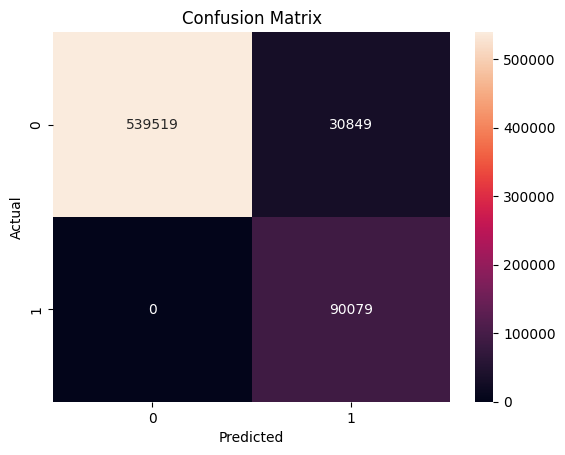

In [ ]:
# prompt: Evaluate the hybrid CNN-LSTM model

# Evaluate the model on the test set
loss, accuracy = gear_cnn_lstm_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = gear_cnn_lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Training and validation accuracy/loss vs. epochs of the Hybrid CNN-LSTM Model**

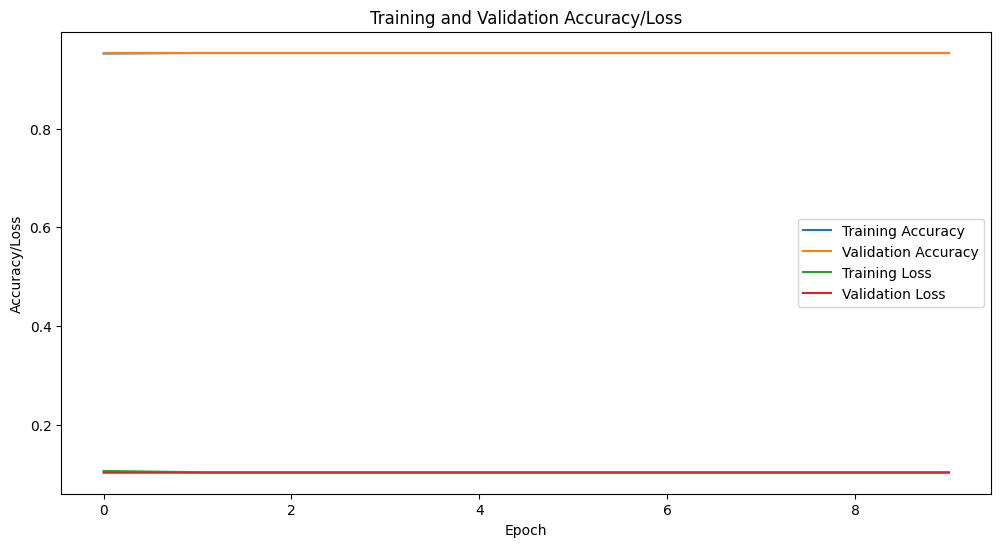

In [ ]:
# prompt: Training and validation accuracy/loss vs. epochs of the Hybrid CNN-LSTM Model in single graph

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


**2. Model Architecture for hybrid TL model**

In [ ]:
# prompt: build a hybrid TL model

from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Reshape
from tensorflow.keras.models import Model

# Define the input
input_layer = Input(shape=(X_train.shape[1], 1))

# Add 1D CNN layers
cnn_out = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
cnn_out = Conv1D(64, 3, activation='relu', padding='same')(cnn_out)
cnn_out = MaxPooling1D(pool_size=1)(cnn_out)

# Flatten the output from the CNN layers
cnn_out = Flatten()(cnn_out)

# Add fully connected layers
dense_out = Dense(50, activation='relu')(cnn_out)
dense_out = Dropout(0.5)(dense_out)

# Handle NaN values and convert 'y' to a consistent type (e.g., string)
y_processed = np.where(pd.isna(y), 'NaN', y).astype(str)  # Replace NaNs with 'NaN' string and convert to string type

# Now calculate unique classes
num_classes = len(np.unique(y_processed))
output_layer = Dense(num_classes, activation='softmax')(dense_out)

# Create the model
gear_tl_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
gear_tl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
gear_tl_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,688 (37.84 KB)

 Trainable params: 9,688 (37.84 KB)

 Non-trainable params: 0 (0.00 B)

**Training Hybrid TL Model**

In [ ]:
# prompt: train the above hybrid TL model

# Assuming 'Flag' column has two unique values and is already one-hot encoded
y_train_encoded = np.argmax(y_train, axis=1)
y_val_encoded = np.argmax(y_val, axis=1)

# The rest of the code remains the same
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Change the file extension to '.keras'
model_checkpoint = ModelCheckpoint('gear_tl.keras', monitor='val_accuracy', save_best_only=True)

history = gear_tl_model.fit(
    X_train, y_train_categorical,
    epochs=10,
    batch_size=512,
    validation_data=(X_val, y_val_categorical),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.9421 - loss: 0.1249 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 2/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 0.9525 - loss: 0.1049 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 3/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9527 - loss: 0.1046 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 4/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9524 - loss: 0.1049 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 5/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9527 - loss: 0.1046 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 6/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - accuracy: 0.9526 - loss: 0.1047 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 7/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9526 - loss: 0.1047 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 8/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9528 - loss: 0

**Evaluate the hybrid TL model**

Test Loss: 0.1040
Test Accuracy: 0.9533
20639/20639 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    570368
           1       0.74      1.00      0.85     90079

    accuracy                           0.95    660447
   macro avg       0.87      0.97      0.91    660447
weighted avg       0.97      0.95      0.96    660447



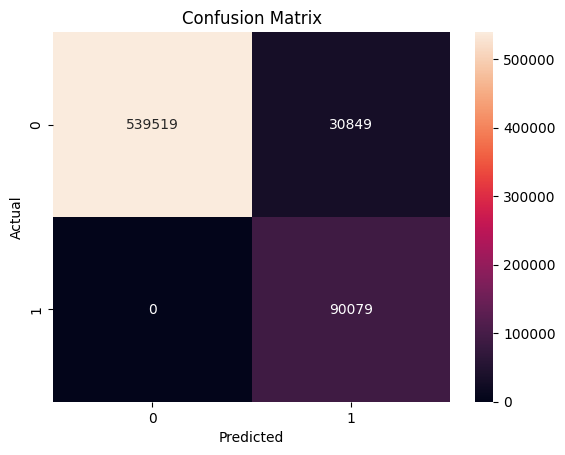

In [ ]:
# prompt: Evaluate the hybrid TL model

# Evaluate the model on the test set
loss, accuracy = gear_tl_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = gear_tl_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Training and validation accuracy/loss vs. epochs of the Hybrid TL Model**

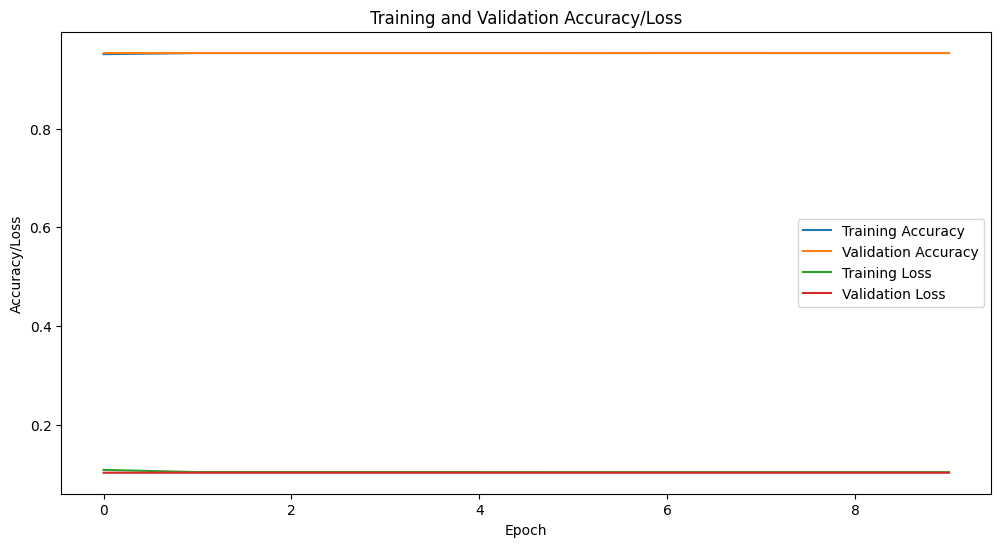

In [ ]:
# **Training and validation accuracy/loss vs. epochs of the Hybrid TL Model**

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

**3. Recurrent Neural Networks (RNNs)**

In [ ]:
# prompt: build a Recurrent Neural Networks (RNNs)

# Define the input
input_layer = Input(shape=(X_train.shape[1], 1))

# Add LSTM layers
lstm_out = LSTM(50, return_sequences=True)(input_layer)
lstm_out = LSTM(50)(lstm_out)

# Add fully connected layers
dense_out = Dense(50, activation='relu')(lstm_out)
dense_out = Dropout(0.5)(dense_out)

# Handle NaN values and convert 'y' to a consistent type (e.g., string)
y_processed = np.where(pd.isna(y), 'NaN', y).astype(str)  # Replace NaNs with 'NaN' string and convert to string type

# Now calculate unique classes
num_classes = len(np.unique(y_processed))
output_layer = Dense(num_classes, activation='softmax')(dense_out)

# Create the model
gear_rnn_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
gear_rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
gear_rnn_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 1, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,252 (129.89 KB)

 Trainable params: 33,252 (129.89 KB)

 Non-trainable params: 0 (0.00 B)

**Training the RNNs Model**

In [ ]:
# Assuming 'Flag' column has two unique values and is already one-hot encoded
y_train_encoded = np.argmax(y_train, axis=1)
y_val_encoded = np.argmax(y_val, axis=1)

# The rest of the code remains the same
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Change the file extension to '.keras'
model_checkpoint = ModelCheckpoint('gear_rnn.keras', monitor='val_accuracy', save_best_only=True)

history = gear_rnn_model.fit(
    X_train, y_train_categorical,
    epochs=10,
    batch_size=512,
    validation_data=(X_val, y_val_categorical),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 71s 11ms/step - accuracy: 0.9421 - loss: 0.1281 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 2/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.9525 - loss: 0.1048 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 3/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 70s 12ms/step - accuracy: 0.9527 - loss: 0.1046 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 4/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 79s 11ms/step - accuracy: 0.9529 - loss: 0.1044 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 5/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - accuracy: 0.9527 - loss: 0.1046 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 6/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 66s 11ms/step - accuracy: 0.9526 - loss: 0.1047 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 7/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.9527 - loss: 0.1045 - val_accuracy: 0.9534 - val_loss: 0.1034
Epoch 8/10
6020/6020 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.9525 -

**Evaluate the RNNs Model**

Test Loss: 0.1040
Test Accuracy: 0.9533
20639/20639 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    570368
           1       0.74      1.00      0.85     90079

    accuracy                           0.95    660447
   macro avg       0.87      0.97      0.91    660447
weighted avg       0.97      0.95      0.96    660447



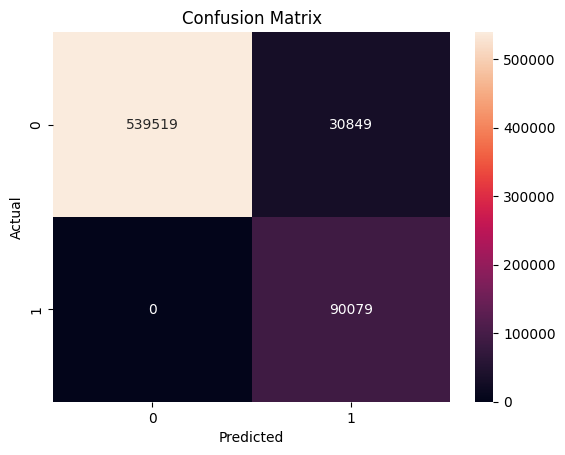

In [ ]:
# Evaluate the model on the test set
loss, accuracy = gear_rnn_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = gear_rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Training and validation accuracy/loss vs. epochs of the RNNs Model**

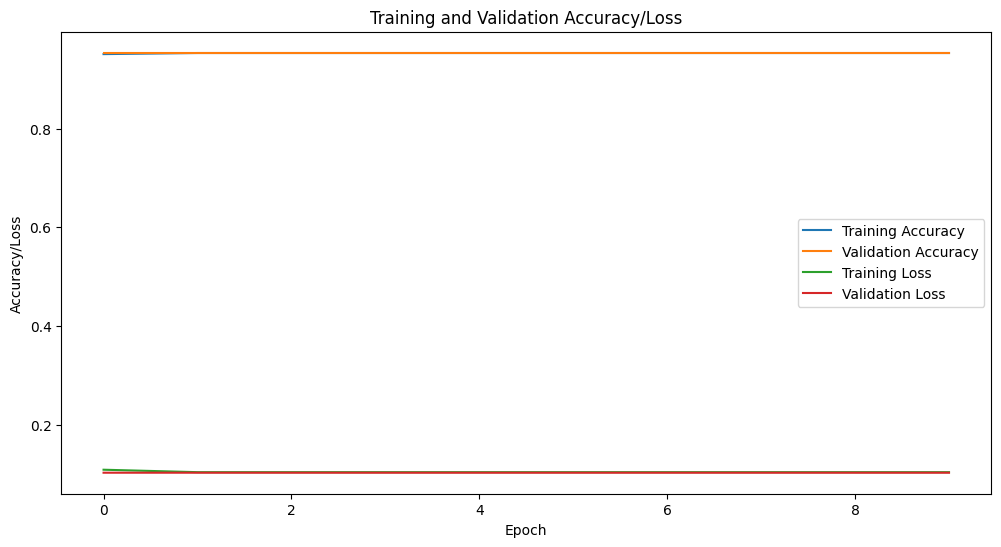

In [ ]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


**Detection rate vs. Epochs of the hybrid TL model**

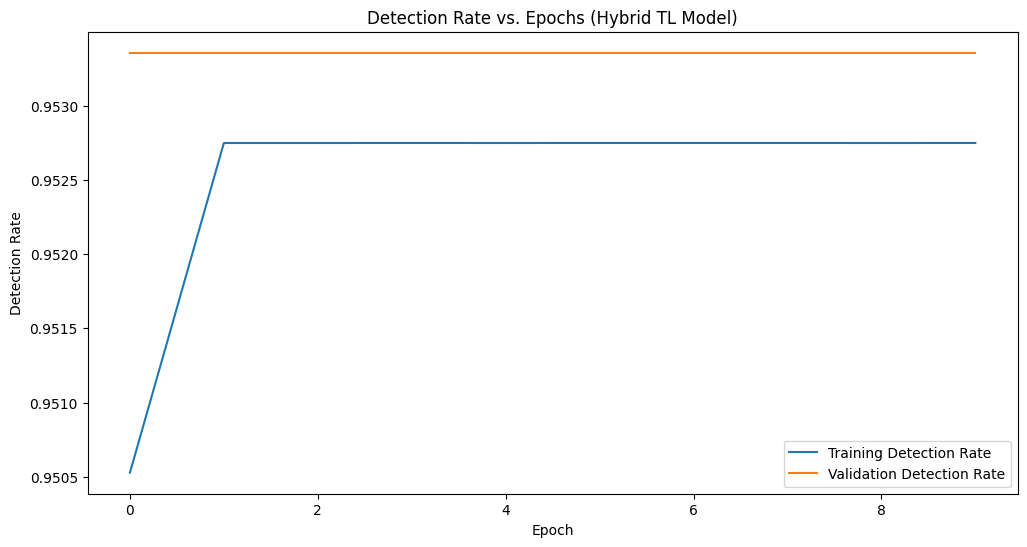

In [ ]:
# prompt: Detection rate vs. Epochs of the hybrid TL model

# Assuming 'history' is the training history of the hybrid TL model
# Plot detection rate (accuracy) vs. epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Detection Rate')
plt.plot(history.history['val_accuracy'], label='Validation Detection Rate')
plt.title('Detection Rate vs. Epochs (Hybrid TL Model)')
plt.xlabel('Epoch')
plt.ylabel('Detection Rate')
plt.legend()
plt.show()


**False alarm rate vs Epoch of the hybrid TL model**

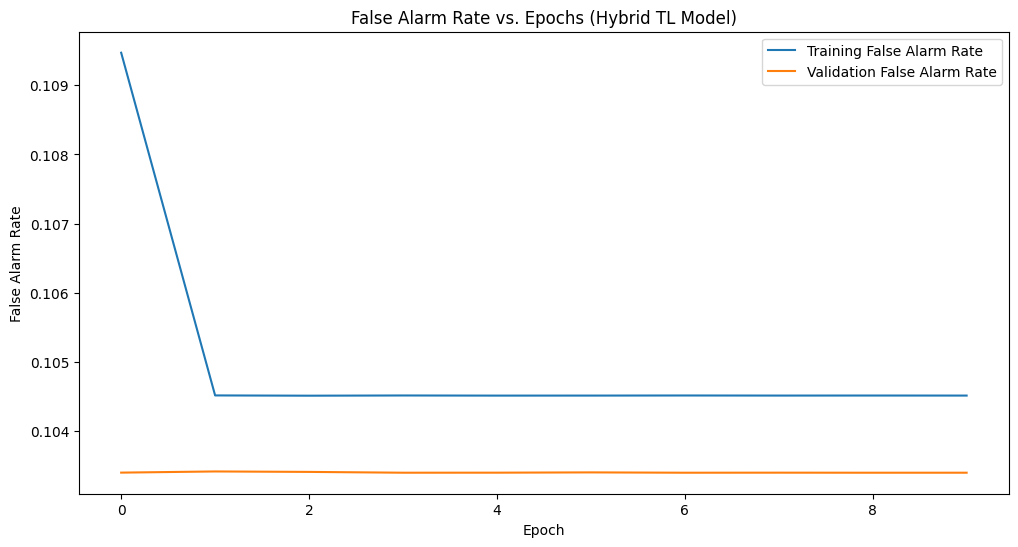

In [ ]:
# prompt: False alarm rate vs Epoch of the hybrid TL model

# Assuming 'history' is the training history of the hybrid TL model
# Plot false alarm rate (1 - specificity) vs. epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training False Alarm Rate')
plt.plot(history.history['val_loss'], label='Validation False Alarm Rate')
plt.title('False Alarm Rate vs. Epochs (Hybrid TL Model)')
plt.xlabel('Epoch')
plt.ylabel('False Alarm Rate')
plt.legend()
plt.show()


**ROC curve of the  hybrid TL model for fuzzy attack detection**

20639/20639 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step


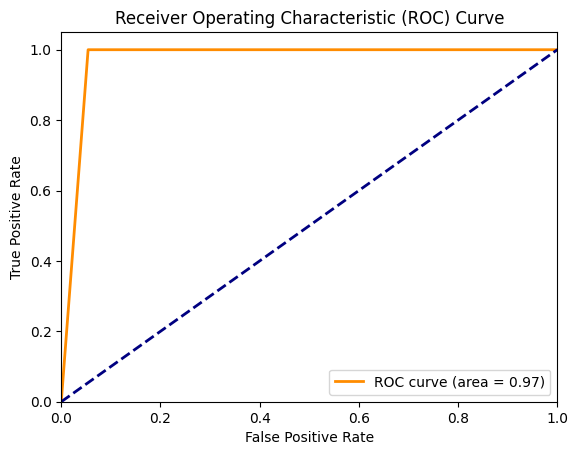

In [ ]:
# prompt: ROC curve of the  hybrid TL model for fuzzy attack detection

from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_prob = gear_tl_model.predict(X_test)[:, 1]  # Assuming binary classification

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# prompt: Comparative results for above models(test, train, valid)set and evaluate the model

# Evaluate the hybrid CNN-LSTM model
loss_train_cnn_lstm, accuracy_train_cnn_lstm = gear_cnn_lstm_model.evaluate(X_train, y_train, verbose=0)
loss_val_cnn_lstm, accuracy_val_cnn_lstm = gear_cnn_lstm_model.evaluate(X_val, y_val, verbose=0)
loss_test_cnn_lstm, accuracy_test_cnn_lstm = gear_cnn_lstm_model.evaluate(X_test, y_test, verbose=0)

print("Hybrid CNN-LSTM Model:")
print(f"Train Loss: {loss_train_cnn_lstm:.4f}, Train Accuracy: {accuracy_train_cnn_lstm:.4f}")
print(f"Validation Loss: {loss_val_cnn_lstm:.4f}, Validation Accuracy: {accuracy_val_cnn_lstm:.4f}")
print(f"Test Loss: {loss_test_cnn_lstm:.4f}, Test Accuracy: {accuracy_test_cnn_lstm:.4f}")

# Evaluate the hybrid TL model
loss_train_tl, accuracy_train_tl = gear_tl_model.evaluate(X_train, y_train, verbose=0)
loss_val_tl, accuracy_val_tl = gear_tl_model.evaluate(X_val, y_val, verbose=0)
loss_test_tl, accuracy_test_tl = gear_tl_model.evaluate(X_test, y_test, verbose=0)

print("\nHybrid TL Model:")
print(f"Train Loss: {loss_train_tl:.4f}, Train Accuracy: {accuracy_train_tl:.4f}")
print(f"Validation Loss: {loss_val_tl:.4f}, Validation Accuracy: {accuracy_val_tl:.4f}")
print(f"Test Loss: {loss_test_tl:.4f}, Test Accuracy: {accuracy_test_tl:.4f}")

# Evaluate the RNN model
loss_train_rnn, accuracy_train_rnn = gear_rnn_model.evaluate(X_train, y_train, verbose=0)
loss_val_rnn, accuracy_val_rnn = gear_rnn_model.evaluate(X_val, y_val, verbose=0)
loss_test_rnn, accuracy_test_rnn = gear_rnn_model.evaluate(X_test, y_test, verbose=0)

print("\nRNN Model:")
print(f"Train Loss: {loss_train_rnn:.4f}, Train Accuracy: {accuracy_train_rnn:.4f}")
print(f"Validation Loss: {loss_val_rnn:.4f}, Validation Accuracy: {accuracy_val_rnn:.4f}")
print(f"Test Loss: {loss_test_rnn:.4f}, Test Accuracy: {accuracy_test_rnn:.4f}")


Hybrid CNN-LSTM Model:
Train Loss: 0.1045, Train Accuracy: 0.9527
Validation Loss: 0.1034, Validation Accuracy: 0.9534
Test Loss: 0.1040, Test Accuracy: 0.9533

Hybrid TL Model:
Train Loss: 0.1045, Train Accuracy: 0.9527
Validation Loss: 0.1034, Validation Accuracy: 0.9534
Test Loss: 0.1040, Test Accuracy: 0.9533

RNN Model:
Train Loss: 0.1045, Train Accuracy: 0.9527
Validation Loss: 0.1034, Validation Accuracy: 0.9534
Test Loss: 0.1040, Test Accuracy: 0.9533


In [ ]:
# prompt: Evaluate the above hybrid TL model, hybrid CNN-LSTM model and RNNs model in single dataframe

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the hybrid TL model
y_pred_tl = gear_tl_model.predict(X_test)
y_pred_tl_classes = np.argmax(y_pred_tl, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

tl_accuracy = accuracy_score(y_test_classes, y_pred_tl_classes)
tl_precision = precision_score(y_test_classes, y_pred_tl_classes)
tl_recall = recall_score(y_test_classes, y_pred_tl_classes)
tl_f1 = f1_score(y_test_classes, y_pred_tl_classes)

# Evaluate the hybrid CNN-LSTM model
y_pred_cnn_lstm = gear_cnn_lstm_model.predict(X_test)
y_pred_cnn_lstm_classes = np.argmax(y_pred_cnn_lstm, axis=1)

cnn_lstm_accuracy = accuracy_score(y_test_classes, y_pred_cnn_lstm_classes)
cnn_lstm_precision = precision_score(y_test_classes, y_pred_cnn_lstm_classes)
cnn_lstm_recall = recall_score(y_test_classes, y_pred_cnn_lstm_classes)
cnn_lstm_f1 = f1_score(y_test_classes, y_pred_cnn_lstm_classes)

# Evaluate the RNNs model
y_pred_rnn = gear_rnn_model.predict(X_test)
y_pred_rnn_classes = np.argmax(y_pred_rnn, axis=1)

rnn_accuracy = accuracy_score(y_test_classes, y_pred_rnn_classes)
rnn_precision = precision_score(y_test_classes, y_pred_rnn_classes)
rnn_recall = recall_score(y_test_classes, y_pred_rnn_classes)
rnn_f1 = f1_score(y_test_classes, y_pred_rnn_classes)

# Create a DataFrame to store the results
data = {
    'Model': ['Hybrid TL', 'Hybrid CNN-LSTM', 'RNNs'],
    'Accuracy': [tl_accuracy, cnn_lstm_accuracy, rnn_accuracy],
    'Precision': [tl_precision, cnn_lstm_precision, rnn_precision],
    'Recall': [tl_recall, cnn_lstm_recall, rnn_recall],
    'F1-Score': [tl_f1, cnn_lstm_f1, rnn_f1]
}
results_df = pd.DataFrame(data)

# Display the results
print(results_df)


20639/20639 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step
20639/20639 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step
20639/20639 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step
             Model  Accuracy  Precision  Recall  F1-Score
0        Hybrid TL  0.953291   0.744898     1.0  0.853801
1  Hybrid CNN-LSTM  0.953291   0.744898     1.0  0.853801
2             RNNs  0.953291   0.744898     1.0  0.853801


#===========================================

# DoS_Attack

# Data Preprocessing

**Step 1: Data Collection**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df3=pd.read_csv('/content/drive/MyDrive/DoS_dataset.csv')
# prompt: change coloum names with attributes Timestamp, CAN ID, DLC, DATA[0], DATA[1], DATA[2], DATA[3], DATA[4], DATA[5], DATA[6], DATA[7], Flag

df3.columns = ['Timestamp', 'CAN ID', 'DLC', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag']
df3

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
1,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
2,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
3,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
4,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3665765,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
3665766,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
3665767,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
3665768,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


**step 2: Data Cleaning**\
 **---> Removal of duplicates**

In [2]:
# Removing of duplicate values
df3.drop_duplicates(inplace=True)
# handling null values
df3.dropna(inplace=True)
df3

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
1,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
2,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
3,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
4,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3665765,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
3665766,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
3665767,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
3665768,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


**step 3: Data Transfermation**\
 **----> Splitting data_field**

In [3]:
# prompt: Splitting data_field

# Convert the column to string type before applying the split
df3['DATA[0]'] = df3['DATA[0]'].astype(str).apply(lambda x: x.split(' ')[0])
df3['DATA[1]'] = df3['DATA[1]'].astype(str).apply(lambda x: x.split(' ')[0])
df3['DATA[2]'] = df3['DATA[2]'].astype(str).apply(lambda x: x.split(' ')[0])
df3['DATA[3]'] = df3['DATA[3]'].astype(str).apply(lambda x: x.split(' ')[0])
df3['DATA[4]'] = df3['DATA[4]'].astype(str).apply(lambda x: x.split(' ')[0])
df3['DATA[5]'] = df3['DATA[5]'].astype(str).apply(lambda x: x.split(' ')[0])
df3['DATA[6]'] = df3['DATA[6]'].astype(str).apply(lambda x: x.split(' ')[0])
df3['DATA[7]'] = df3['DATA[7]'].astype(str).apply(lambda x: x.split(' ')[0])

**----> Changing non numerical coloums into numerical coloums**

In [4]:
# prompt: change non numerical data coloums in numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['DATA[0]'] = le.fit_transform(df3['DATA[0]'])
df3['DATA[1]'] = le.fit_transform(df3['DATA[1]'])
df3['DATA[2]'] = le.fit_transform(df3['DATA[2]'])
df3['DATA[3]'] = le.fit_transform(df3['DATA[3]'])
df3['DATA[4]'] = le.fit_transform(df3['DATA[4]'])
df3['DATA[5]'] = le.fit_transform(df3['DATA[5]'])
df3['DATA[6]'] = le.fit_transform(df3['DATA[6]'])
df3['DATA[7]'] = le.fit_transform(df3['DATA[7]'])
df3['Flag'] = le.fit_transform(df3['Flag'])

**-----> Conversion of hexadecimal values**

In [5]:
# prompt: convert all hexadecimal values into decimal values(int)

# Select columns containing hexadecimal values
hex_columns = ['CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']

# Convert hexadecimal values to decimal, handling non-hex characters
for col in hex_columns:
  df3[col] = df3[col].apply(lambda x: int(str(x), 16) if isinstance(x, str) and all(c in '0123456789abcdefABCDEF' for c in x) else x)
  # The added condition 'all(c in '0123456789abcdefABCDEF' for c in x)' ensures that the string x contains only valid hexadecimal characters before attempting conversion.

df3

,Timestamp,CAN ID,DLC,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478198e+09,399,8,106,28,0,0,0,60,0,0,0
1,1.478198e+09,608,8,25,2,11,7,8,142,46,58,0
2,1.478198e+09,672,8,68,0,47,5,131,2,73,0,0
3,1.478198e+09,809,8,51,65,39,4,17,32,0,20,0
4,1.478198e+09,1349,8,92,0,0,22,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3665765,1.478201e+09,399,8,106,26,0,0,0,65,0,0,0
3665766,1.478201e+09,608,8,24,2,10,7,8,143,46,25,0
3665767,1.478201e+09,672,8,36,0,47,5,131,2,73,0,0
3665768,1.478201e+09,809,8,94,61,39,4,17,32,0,20,0


**Step 4: Data Normalization**

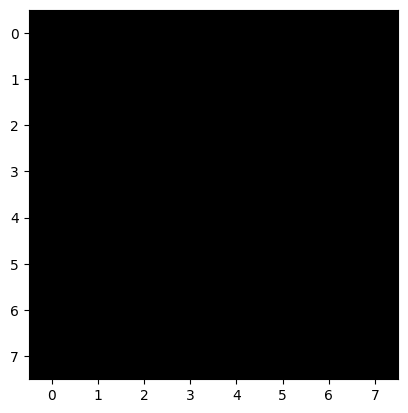

In [6]:
import numpy as np

# Convert each row of the DataFrame to a 2D array of size 8x8
# Handle rows with unexpected length
images = []
for row in df3.values:
    try:
        # Attempt to reshape the row into an 8x8 array
        image = np.array(row[3:11], dtype=np.uint8).reshape(8, 8)
    except ValueError:
        # If reshaping fails, create an 8x8 array filled with zeros
        image = np.zeros((8, 8), dtype=np.uint8)
    images.append(image)

images = np.array(images)  # Convert the list of images to a NumPy array

# Plot the first image as an example
plt.imshow(images[0], cmap='gray')
plt.show()

**----> Feature Scaling**

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Reshape the images array to 2D
images_2D = images.reshape(images.shape[0], -1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 2D images data
scaler.fit(images_2D)

# Transform the 2D images data using the fitted scaler
scaled_images = scaler.transform(images_2D)

# Print the first 5 rows of the scaled data
print(scaled_images[0:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**----> Quantile Normalization**

In [8]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer, StandardScaler

# Code to create the 'images' array should be added here.
# For example, if 'images' was created from a DataFrame 'df' as in
# the provided 'ipython-input-13-d13f7217e7bc' file, you would include that code here.

# Assuming 'images' is already defined from previous steps
# Reshape the images array to 2D
images_2D = images.reshape(images.shape[0], -1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 2D images data
scaler.fit(images_2D)

# Transform the 2D images data using the fitted scaler
scaled_images = scaler.transform(images_2D) # Calculate scaled_images

# Create a QuantileTransformer object
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Fit the transformer to the scaled images data
quantile_transformer.fit(scaled_images)

# Transform the scaled images data using the fitted transformer
normalized_images = quantile_transformer.transform(scaled_images)

# Print the first 5 rows of the normalized data
print(normalized_images[0:5])

[[-5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758]
 [-5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758

In [9]:
from scipy.stats import rankdata
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample data - replace with your actual data
images = np.random.rand(100, 28, 28)

# Reshape the images array to 2D
images_2D = images.reshape(images.shape[0], -1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 2D images data
scaler.fit(images_2D)

# Transform the 2D images data using the fitted scaler
scaled_images = scaler.transform(images_2D) # Calculate scaled_images

# Convert the scaled data to ranks
ranked_data = rankdata(scaled_images)

# Apply quantile normalization to the ranked data
normalized_data = np.quantile(ranked_data, np.linspace(0, 1, len(ranked_data)))

# Print the first 5 rows of the normalized data
print(normalized_data[0:5])

[1. 2. 3. 4. 5.]


**Step 5: Image Generation**

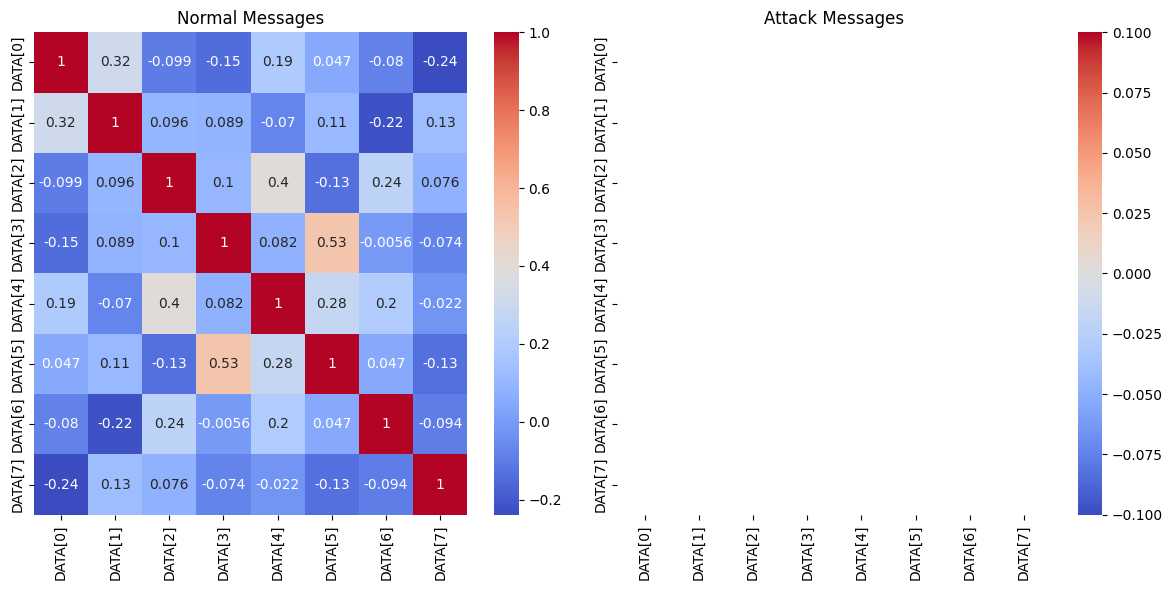

In [10]:
# prompt: image generation for normal and attack message in colormap

# Separate normal and attack messages
normal_df3 = df3[df3['Flag'] == 0]
attack_df3 = df3[df3['Flag'] == 1]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Normal messages
sns.heatmap(normal_df3[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].corr(), annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Normal Messages')

# Attack messages
sns.heatmap(attack_df3[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].corr(), annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Attack Messages')

plt.tight_layout()
plt.show()


**Step 6: Label Encoding**

In [11]:
# prompt: Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Flag' column
df3['Flag'] = label_encoder.fit_transform(df3['Flag'])
df3 = df3.drop('DLC', axis=1)
# Display the updated DataFrame
df3


,Timestamp,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag
0,1.478198e+09,399,106,28,0,0,0,60,0,0,0
1,1.478198e+09,608,25,2,11,7,8,142,46,58,0
2,1.478198e+09,672,68,0,47,5,131,2,73,0,0
3,1.478198e+09,809,51,65,39,4,17,32,0,20,0
4,1.478198e+09,1349,92,0,0,22,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3665765,1.478201e+09,399,106,26,0,0,0,65,0,0,0
3665766,1.478201e+09,608,24,2,10,7,8,143,46,25,0
3665767,1.478201e+09,672,36,0,47,5,131,2,73,0,0
3665768,1.478201e+09,809,94,61,39,4,17,32,0,20,0


***Step 7: Anomaly Detection Specific Features***

In [12]:
# prompt: Anomaly Detection Specific Features
#  Enhance the model’s ability to detect anomalies by adding derived features.

# Calculate the difference between consecutive timestamps
df3['Timestamp_diff'] = df3['Timestamp'].diff()

# Calculate the difference between consecutive CAN IDs
df3['CAN_ID_diff'] = df3['CAN ID'].diff()

# Calculate the sum of the payload values
df3['Payload_sum'] = df3[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].sum(axis=1)

# Calculate the standard deviation of the payload values
df3['Payload_std'] = df3[['DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]']].std(axis=1)

# Display the updated DataFrame
df3


,Timestamp,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Flag,Timestamp_diff,CAN_ID_diff,Payload_sum,Payload_std
0,1.478198e+09,399,106,28,0,0,0,60,0,0,0,NaN,NaN,194,39.488696
1,1.478198e+09,608,25,2,11,7,8,142,46,58,0,0.000228,209.0,299,46.800298
2,1.478198e+09,672,68,0,47,5,131,2,73,0,0,0.000232,64.0,326,47.909886
3,1.478198e+09,809,51,65,39,4,17,32,0,20,0,0.000237,137.0,228,22.608469
4,1.478198e+09,1349,92,0,0,22,0,0,0,0,0,0.000241,540.0,114,32.345236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665765,1.478201e+09,399,106,26,0,0,0,65,0,0,0,0.000225,-391.0,197,40.153055
3665766,1.478201e+09,608,24,2,10,7,8,143,46,25,0,0.000230,209.0,265,46.606062
3665767,1.478201e+09,672,36,0,47,5,131,2,73,0,0,0.000234,64.0,294,46.628471
3665768,1.478201e+09,809,94,61,39,4,17,32,0,20,0,0.000232,137.0,267,31.386701


**Step 8: Feature Selection**

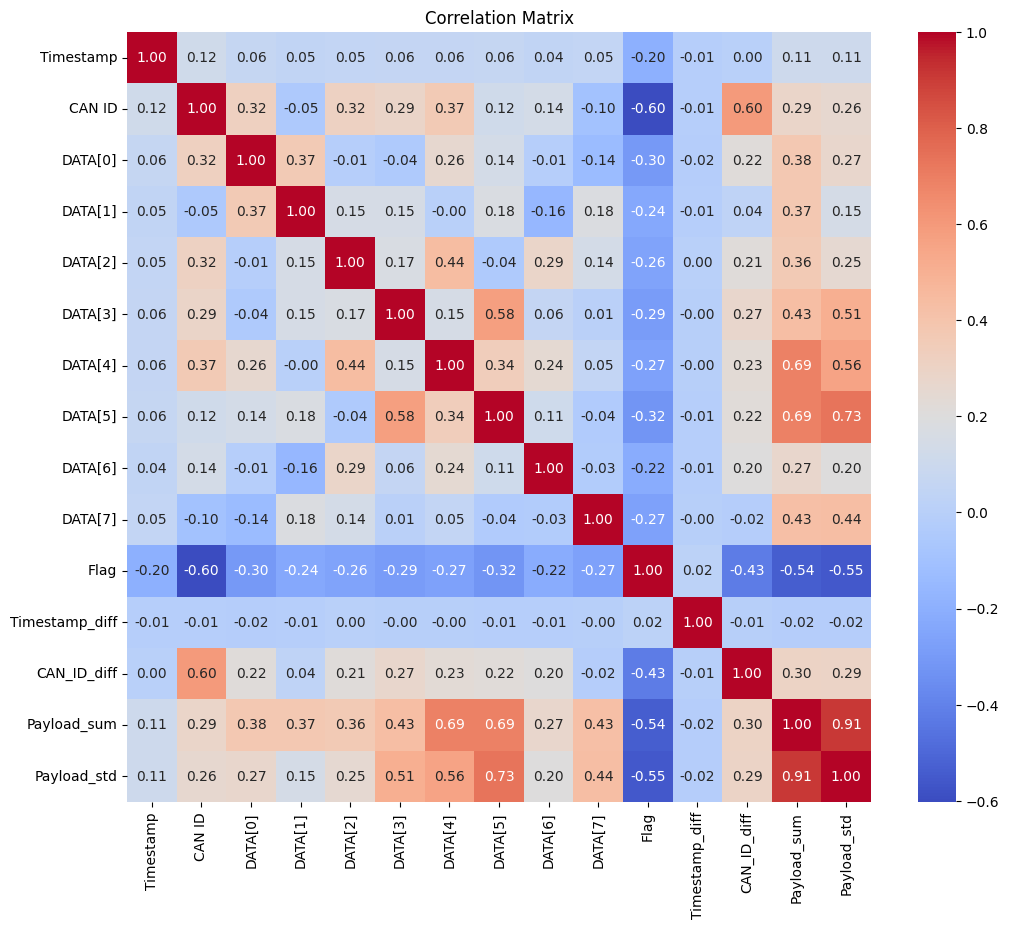

Relevant features: ['Timestamp', 'CAN ID', 'DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]', 'DATA[5]', 'DATA[6]', 'DATA[7]', 'Flag', 'CAN_ID_diff', 'Payload_sum', 'Payload_std']


In [13]:
# prompt: Feature Selection

# Feature Selection

# Correlation Matrix
correlation_matrix = df3.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Select features based on correlation with the target variable
# Example: Select features with correlation above a threshold
threshold = 0.1
relevant_features = correlation_matrix['Flag'][abs(correlation_matrix['Flag']) > threshold].index.tolist()
print("Relevant features:", relevant_features)

# You can also use other feature selection techniques like:
# - Recursive Feature Elimination (RFE)
# - SelectKBest
# - Feature Importance from Tree-based models


**Step 9: Extracting and splitting data**

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Extract the CAN ID and Flag columns
X = df3['CAN ID'].astype(str).values  # Convert CAN ID to strings
y = df3['Flag'].values

# Tokenize the CAN messages
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)  # Now X contains strings
X_seq = tokenizer.texts_to_sequences(X)

# Pad the sequences to ensure uniform input size
max_len = max(len(x) for x in X_seq)
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post')

# Reshape data to fit the CNN input format (samples, timesteps, features)
X_padded = X_padded.reshape(X_padded.shape[0], X_padded.shape[1], 1)

# Convert target to categorical
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes of the datasets to verify
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2544207, 1, 1)
X_val shape: (545187, 1, 1)
X_test shape: (545188, 1, 1)
y_train shape: (2544207, 2)
y_val shape: (545187, 2)
y_test shape: (545188, 2)


# Building Models

**1.Model Architecture for hybrid CNN-LSTM model**

In [15]:
# prompt: stop overfitting model and build new hybrid CNN-LSTM model
from tensorflow.keras.layers import Input, BatchNormalization, Reshape  # Import Input, BatchNormalization, and Reshape

# Define the input
input_layer = Input(shape=(X_train.shape[1], 1))

# Add 1D CNN layers with Batch Normalization
cnn_out = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
cnn_out = BatchNormalization()(cnn_out)  # Add Batch Normalization after Conv1D
cnn_out = Conv1D(64, 3, activation='relu', padding='same')(cnn_out)
cnn_out = BatchNormalization()(cnn_out)  # Add Batch Normalization after Conv1D
cnn_out = MaxPooling1D(pool_size=1)(cnn_out)

# Flatten the output from the CNN layers
cnn_out = Flatten()(cnn_out)

# Add LSTM layers
lstm_out = Reshape((1, -1))(cnn_out)
lstm_out = LSTM(50, return_sequences=True)(lstm_out)
lstm_out = LSTM(50)(lstm_out)

# Add fully connected layers with L2 regularization
dense_out = Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(lstm_out)
dense_out = Dropout(0.5)(dense_out)

# Handle NaN values and convert 'y' to a consistent type (e.g., string)
y_processed = np.where(pd.isna(y), 'NaN', y).astype(str)  # Replace NaNs with 'NaN' string and convert to string type

# Now calculate unique classes
num_classes = len(np.unique(y_processed))
output_layer = Dense(num_classes, activation='softmax')(dense_out)

# Create the model
from tensorflow.keras.models import Model # Import the Model class
dos_cnn_lstm_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
dos_cnn_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Display model summary
dos_cnn_lstm_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1, 50)               │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,572 (205.36 KB)

 Trainable params: 52,380 (204.61 KB)

 Non-trainable params: 192 (768.00 B)

**Train Hybrid CNN-LSTM model**

In [16]:
# prompt: Encoding the target labels and train Hybrid CNN-LSTM model

# Assuming 'Flag' column has two unique values and is already one-hot encoded
y_train_encoded = np.argmax(y_train, axis=1)
y_val_encoded = np.argmax(y_val, axis=1)

# The rest of the code remains the same
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Change the file extension to '.keras'
model_checkpoint = ModelCheckpoint('dos_cnn_lstm.keras', monitor='val_accuracy', save_best_only=True)

history = dos_cnn_lstm_model.fit(
    X_train, y_train_categorical,
    epochs=10,
    batch_size=256,
    validation_data=(X_val, y_val_categorical),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
9939/9939 ━━━━━━━━━━━━━━━━━━━━ 109s 10ms/step - accuracy: 0.9942 - loss: 0.0533 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 2/10
9939/9939 ━━━━━━━━━━━━━━━━━━━━ 142s 10ms/step - accuracy: 0.9993 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 9.8440e-04
Epoch 3/10
9939/9939 ━━━━━━━━━━━━━━━━━━━━ 98s 10ms/step - accuracy: 0.9990 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 4/10
9939/9939 ━━━━━━━━━━━━━━━━━━━━ 100s 10ms/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 6.5470e-04
Epoch 5/10
9939/9939 ━━━━━━━━━━━━━━━━━━━━ 101s 10ms/step - accuracy: 0.9990 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 7.3082e-04
Epoch 6/10
9939/9939 ━━━━━━━━━━━━━━━━━━━━ 140s 10ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 7/10
9939/9939 ━━━━━━━━━━━━━━━━━━━━ 140s 10ms/step - accuracy: 0.9992 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 8/10
9939/9939 ━━━━━━━━━━━━━━━━━━━━ 100s 10ms/step -

**Evaluate the hybrid CNN LSTM model**

Test Loss: 0.0004
Test Accuracy: 1.0000
17038/17038 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    457056
           1       1.00      1.00      1.00     88132

    accuracy                           1.00    545188
   macro avg       1.00      1.00      1.00    545188
weighted avg       1.00      1.00      1.00    545188



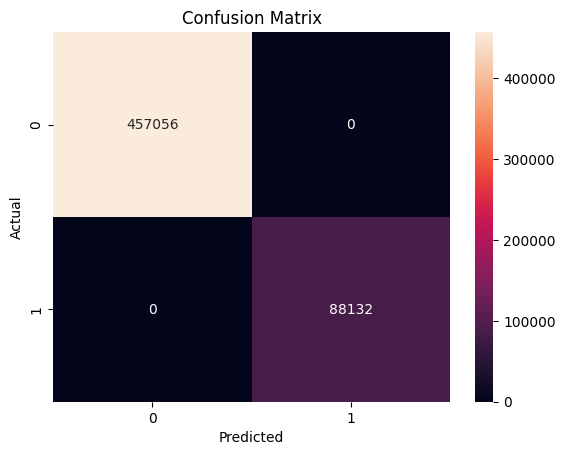

In [17]:
# prompt: Evaluate the hybrid CNN-LSTM model

# Evaluate the model on the test set
loss, accuracy = dos_cnn_lstm_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = dos_cnn_lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Training and validation accuracy/loss vs. epochs of the Hybrid CNN-LSTM Model**

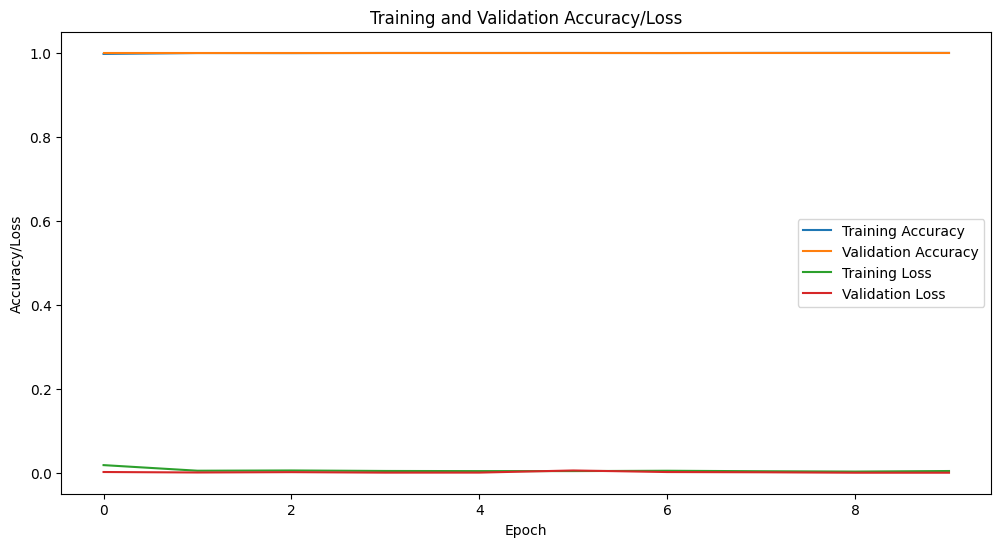

In [18]:
# prompt: Training and validation accuracy/loss vs. epochs of the Hybrid CNN-LSTM Model in single graph

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


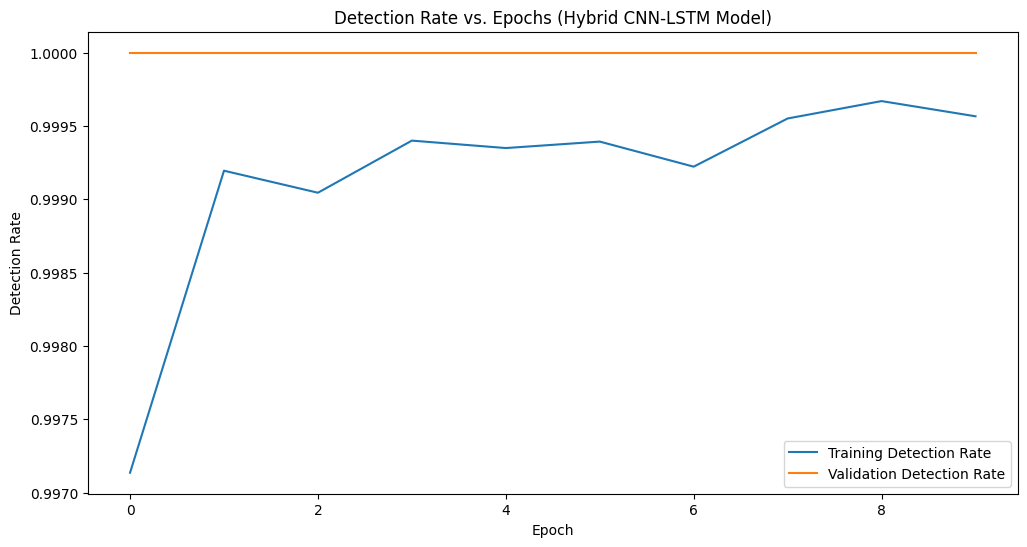

In [19]:
# prompt: detection rate and epchos of hybrid CNN-LSTM model

# Assuming 'history' is the training history of the hybrid CNN-LSTM model
# Plot detection rate (accuracy) vs. epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Detection Rate')
plt.plot(history.history['val_accuracy'], label='Validation Detection Rate')
plt.title('Detection Rate vs. Epochs (Hybrid CNN-LSTM Model)')
plt.xlabel('Epoch')
plt.ylabel('Detection Rate')
plt.legend()
plt.show()


**2. Model Architecture for hybrid TL model**

In [20]:
# prompt: build a hybrid TL model without overfitting model

# Define the input
input_layer = Input(shape=(X_train.shape[1], 1))

# Add 1D CNN layers with Batch Normalization
cnn_out = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
cnn_out = BatchNormalization()(cnn_out)  # Add Batch Normalization after Conv1D
cnn_out = Conv1D(64, 3, activation='relu', padding='same')(cnn_out)
cnn_out = BatchNormalization()(cnn_out)  # Add Batch Normalization after Conv1D
cnn_out = MaxPooling1D(pool_size=1)(cnn_out)

# Flatten the output from the CNN layers
cnn_out = Flatten()(cnn_out)

# Add Dense layers with Dropout and L2 regularization
dense_out = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(cnn_out)
dense_out = Dropout(0.5)(dense_out)
dense_out = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(dense_out)
dense_out = Dropout(0.5)(dense_out)

# Handle NaN values and convert 'y' to a consistent type (e.g., string)
y_processed = np.where(pd.isna(y), 'NaN', y).astype(str)  # Replace NaNs with 'NaN' string and convert to string type

# Now calculate unique classes
num_classes = len(np.unique(y_processed))
output_layer = Dense(num_classes, activation='softmax')(dense_out)

# Create the model
dos_tl_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
dos_tl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Display model summary
dos_tl_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,426 (91.51 KB)

 Trainable params: 23,234 (90.76 KB)

 Non-trainable params: 192 (768.00 B)

**Training Hybrid TL Model**

In [22]:
# prompt: train hybrid TL model without overfitting
# Assuming 'Flag' column has two unique values and is already one-hot encoded
y_train_encoded = np.argmax(y_train, axis=1)
y_val_encoded = np.argmax(y_val, axis=1)

# The rest of the code remains the same
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Change the file extension to '.keras'
model_checkpoint = ModelCheckpoint('dos_tl.keras', monitor='val_accuracy', save_best_only=True)

# Fit the model with Early Stopping
history = dos_tl_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Increase the number of epochs
    batch_size=512,  # Adjust batch size if needed
    callbacks=[early_stopping]
)


Epoch 1/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.9980 - loss: 0.0186 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 2/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 55s 11ms/step - accuracy: 0.9990 - loss: 0.0121 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 3/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 93s 13ms/step - accuracy: 0.9992 - loss: 0.0112 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 4/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 58s 8ms/step - accuracy: 0.9995 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 5/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - accuracy: 0.9985 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.9984 - loss: 0.0118 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 7/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - accuracy: 0.9989 - loss: 0.0091 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 8/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - accuracy: 0.9996 - loss:

**Evaluate the hybrid TL model**

Test Loss: 0.0020
Test Accuracy: 1.0000
17038/17038 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    457056
           1       1.00      1.00      1.00     88132

    accuracy                           1.00    545188
   macro avg       1.00      1.00      1.00    545188
weighted avg       1.00      1.00      1.00    545188



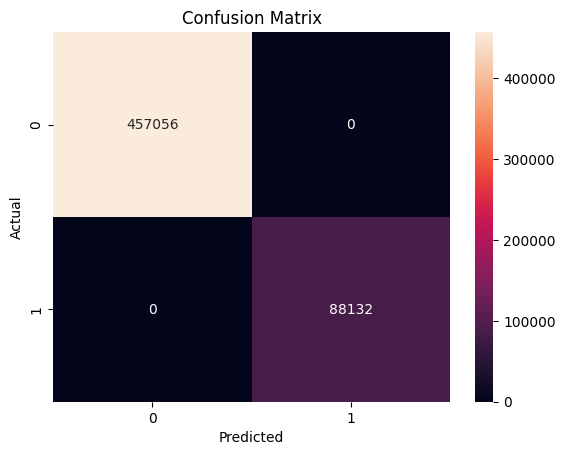

In [23]:
# prompt: Evaluate the hybrid TL model

# Evaluate the model on the test set
loss, accuracy = dos_tl_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = dos_tl_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Training and validation accuracy/loss vs. epochs of the Hybrid TL Model**

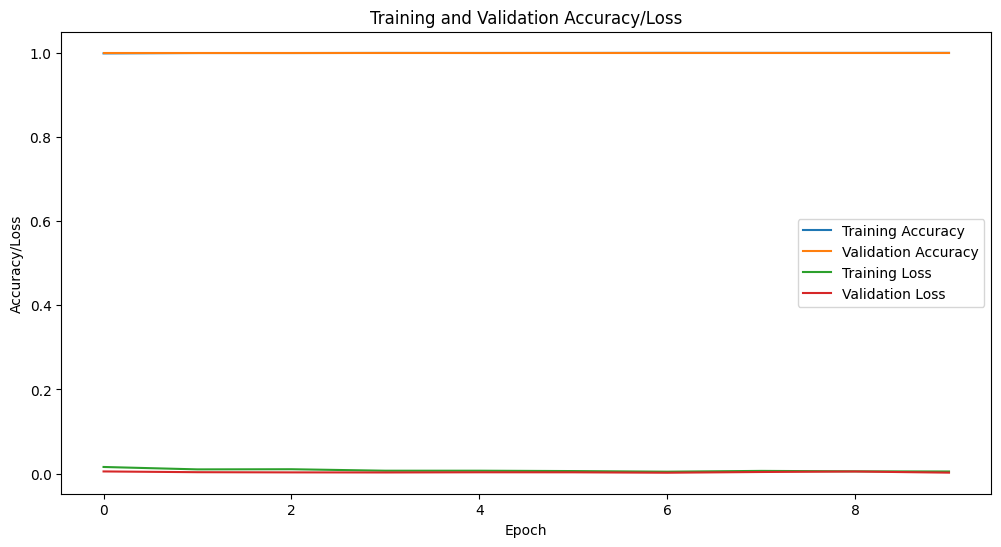

In [24]:
# **Training and validation accuracy/loss vs. epochs of the Hybrid TL Model**

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


**3. Recurrent Neural Networks (RNNs)**

In [25]:
# prompt: build a Recurrent Neural Networks (RNNs)

# Define the input
input_layer = Input(shape=(X_train.shape[1], 1))

# Add LSTM layers
lstm_out = LSTM(50, return_sequences=True)(input_layer)
lstm_out = LSTM(50)(lstm_out)

# Add fully connected layers
dense_out = Dense(50, activation='relu')(lstm_out)
dense_out = Dropout(0.5)(dense_out)

# Handle NaN values and convert 'y' to a consistent type (e.g., string)
y_processed = np.where(pd.isna(y), 'NaN', y).astype(str)  # Replace NaNs with 'NaN' string and convert to string type

# Now calculate unique classes
num_classes = len(np.unique(y_processed))
output_layer = Dense(num_classes, activation='softmax')(dense_out)

# Create the model
dos_model_rnn = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
dos_model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
dos_model_rnn.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 1, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,252 (129.89 KB)

 Trainable params: 33,252 (129.89 KB)

 Non-trainable params: 0 (0.00 B)

**Training the RNNs Model**

In [26]:
# Assuming 'Flag' column has two unique values and is already one-hot encoded
y_train_encoded = np.argmax(y_train, axis=1)
y_val_encoded = np.argmax(y_val, axis=1)

# The rest of the code remains the same
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Change the file extension to '.keras'
model_checkpoint = ModelCheckpoint('dos_rnn.keras', monitor='val_accuracy', save_best_only=True)

history = dos_model_rnn.fit(
    X_train, y_train_categorical,
    epochs=10,
    batch_size=512,
    validation_data=(X_val, y_val_categorical),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 60s 12ms/step - accuracy: 0.9831 - loss: 0.0407 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 1.0000 - loss: 4.6853e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 83s 10ms/step - accuracy: 1.0000 - loss: 2.3762e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 1.0000 - loss: 1.9481e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 54s 11ms/step - accuracy: 1.0000 - loss: 1.4563e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 1.0000 - loss: 1.2987e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
4970/4970 ━━━━━━━━━━━━━━━━━━━━ 85s 11ms/step - accuracy: 1.0000 - loss: 1.4797e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
4970/4970 ━━━

**Evaluate the RNNs Model**

Test Loss: 0.0000
Test Accuracy: 1.0000
17038/17038 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    457056
           1       1.00      1.00      1.00     88132

    accuracy                           1.00    545188
   macro avg       1.00      1.00      1.00    545188
weighted avg       1.00      1.00      1.00    545188



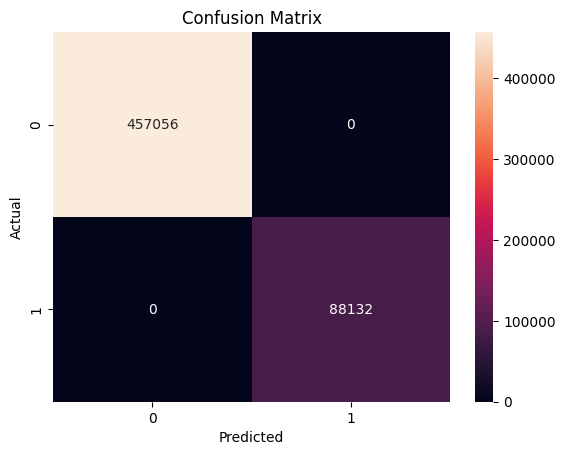

In [27]:
# Evaluate the model on the test set
loss, accuracy = dos_model_rnn.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = dos_model_rnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Training and validation accuracy/loss vs. epochs of the RNNs Model**

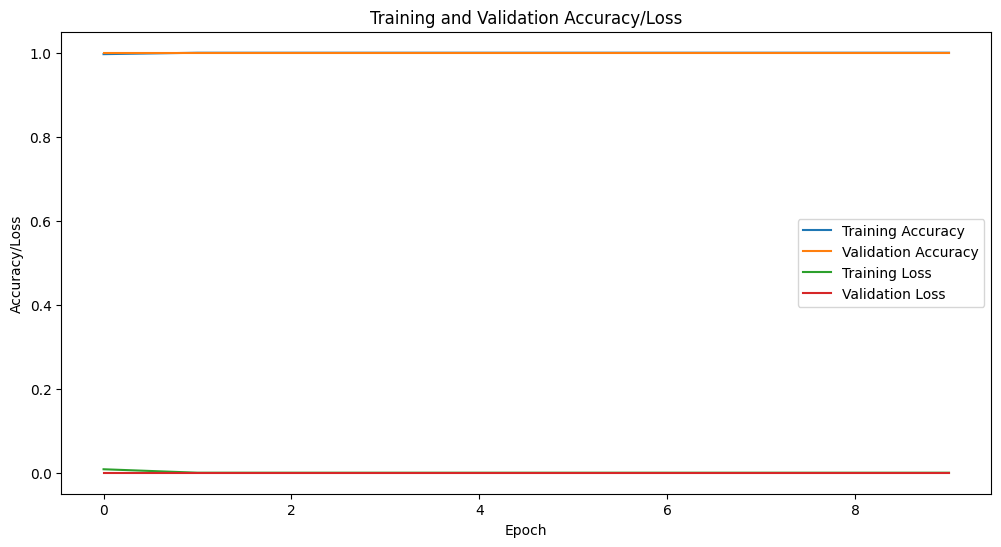

In [28]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


**Detection rate vs. Epochs of the hybrid TL model**

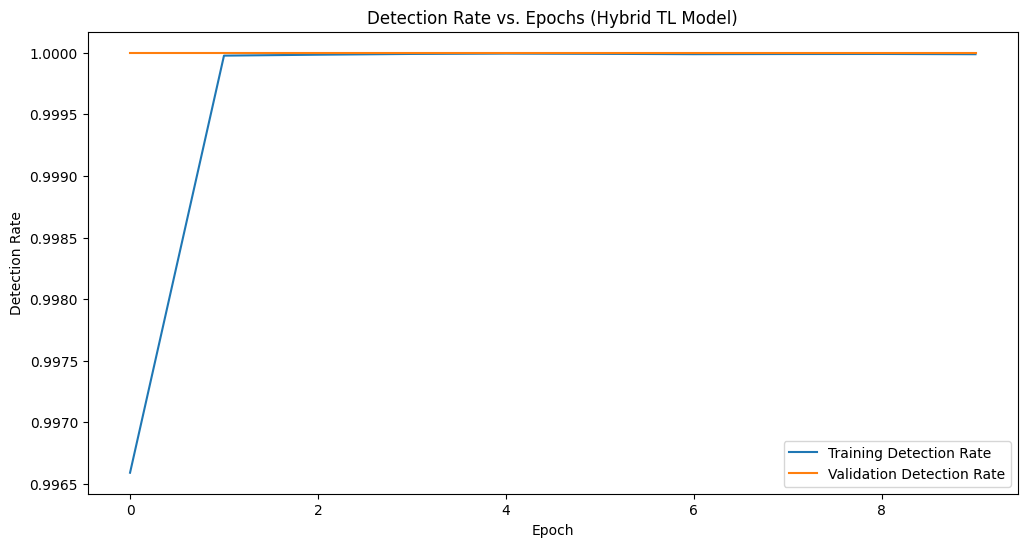

In [29]:
# prompt: Detection rate vs. Epochs of the hybrid TL model

# Assuming 'history' is the training history of the hybrid TL model
# Plot detection rate (accuracy) vs. epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Detection Rate')
plt.plot(history.history['val_accuracy'], label='Validation Detection Rate')
plt.title('Detection Rate vs. Epochs (Hybrid TL Model)')
plt.xlabel('Epoch')
plt.ylabel('Detection Rate')
plt.legend()
plt.show()


**False alarm rate vs Epoch of the hybrid TL model**

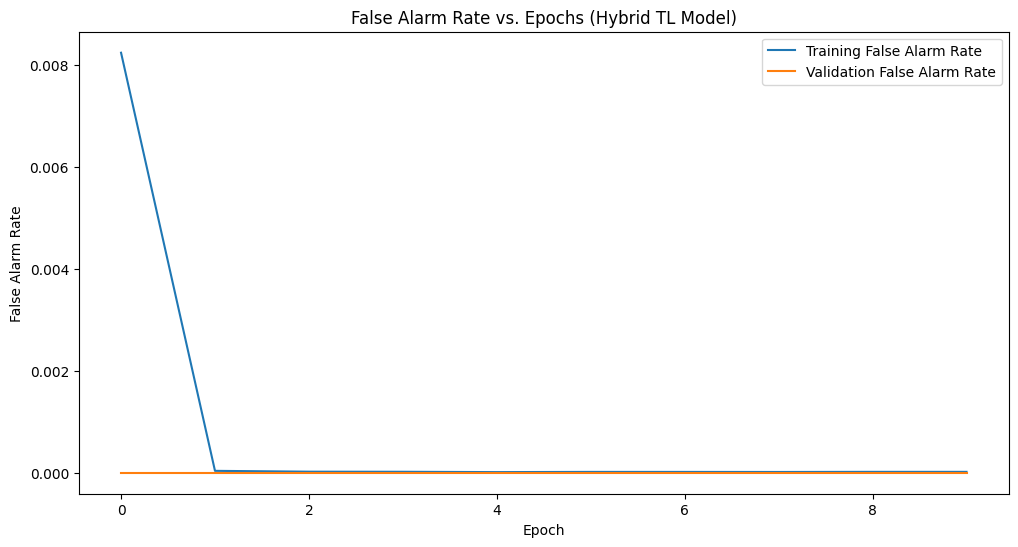

In [30]:
# prompt: False alarm rate vs Epoch of the hybrid TL model

# Assuming 'history' is the training history of the hybrid TL model
# Plot false alarm rate (1 - specificity) vs. epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training False Alarm Rate')
plt.plot(history.history['val_loss'], label='Validation False Alarm Rate')
plt.title('False Alarm Rate vs. Epochs (Hybrid TL Model)')
plt.xlabel('Epoch')
plt.ylabel('False Alarm Rate')
plt.legend()
plt.show()


**ROC curve of the  hybrid TL model for fuzzy attack detection**

17038/17038 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step


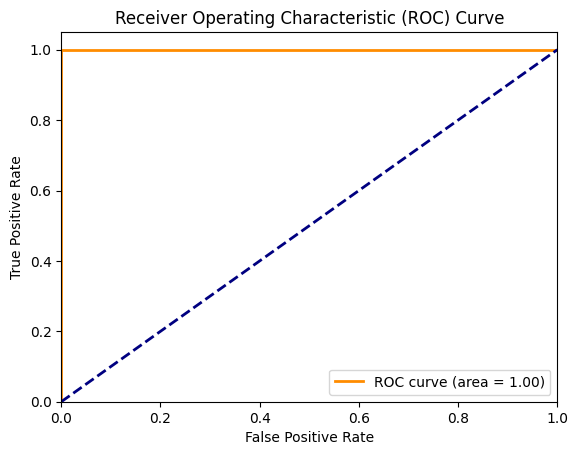

In [31]:
# prompt: ROC curve of the hybrid TL model for fuzzy attack detection

from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_prob = dos_tl_model.predict(X_test)[:, 1]  # Assuming binary classification

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred_prob)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [32]:
# prompt: Evaluate the above hybrid TL model, hybrid CNN-LSTM model and RNNs model in single dataframe

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the hybrid TL model
y_pred_tl = dos_tl_model.predict(X_test)
y_pred_tl_classes = np.argmax(y_pred_tl, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

tl_accuracy = accuracy_score(y_test_classes, y_pred_tl_classes)
tl_precision = precision_score(y_test_classes, y_pred_tl_classes)
tl_recall = recall_score(y_test_classes, y_pred_tl_classes)
tl_f1 = f1_score(y_test_classes, y_pred_tl_classes)

# Evaluate the hybrid CNN-LSTM model
y_pred_cnn_lstm = dos_cnn_lstm_model.predict(X_test)
y_pred_cnn_lstm_classes = np.argmax(y_pred_cnn_lstm, axis=1)

cnn_lstm_accuracy = accuracy_score(y_test_classes, y_pred_cnn_lstm_classes)
cnn_lstm_precision = precision_score(y_test_classes, y_pred_cnn_lstm_classes)
cnn_lstm_recall = recall_score(y_test_classes, y_pred_cnn_lstm_classes)
cnn_lstm_f1 = f1_score(y_test_classes, y_pred_cnn_lstm_classes)

# Evaluate the RNNs model
y_pred_rnn = dos_model_rnn.predict(X_test)
y_pred_rnn_classes = np.argmax(y_pred_rnn, axis=1)

rnn_accuracy = accuracy_score(y_test_classes, y_pred_rnn_classes)
rnn_precision = precision_score(y_test_classes, y_pred_rnn_classes)
rnn_recall = recall_score(y_test_classes, y_pred_rnn_classes)
rnn_f1 = f1_score(y_test_classes, y_pred_rnn_classes)

# Create a DataFrame to store the results
data = {
    'Model': ['Hybrid TL', 'Hybrid CNN-LSTM', 'RNNs'],
    'Accuracy': [tl_accuracy, cnn_lstm_accuracy, rnn_accuracy],
    'Precision': [tl_precision, cnn_lstm_precision, rnn_precision],
    'Recall': [tl_recall, cnn_lstm_recall, rnn_recall],
    'F1-Score': [tl_f1, cnn_lstm_f1, rnn_f1]
}
results_df = pd.DataFrame(data)

# Display the results
print(results_df)


17038/17038 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step
17038/17038 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step
17038/17038 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step
             Model  Accuracy  Precision  Recall  F1-Score
0        Hybrid TL       1.0        1.0     1.0       1.0
1  Hybrid CNN-LSTM       1.0        1.0     1.0       1.0
2             RNNs       1.0        1.0     1.0       1.0


#========================================================

In [45]:
# prompt: display .keras files and there input shapes for predication

# prompt: display .keras files and there input shapes for predication

from tensorflow import keras

model_names = ['rpm_tl.keras','gear_cnn_lstm.keras','gear_tl.keras','gear_rnn.keras','rpm_cnn_lstm.keras','dos_cnn_lstm.keras', 'dos_rnn.keras']

for model_name in model_names:
  try:
    model = keras.models.load_model(model_name)
    print(f"Model: {model_name}")
    print(f"Input Shape: {model.input_shape}")
  except FileNotFoundError:
    print(f"Error: {model_name} not found.")
  except Exception as e:
    print(f"An error occurred loading {model_name}: {e}")
  try:
    model = keras.models.load_model(model_name)
    print(f"Model: {model_name}")
    print(f"Input Shape: {model.input_shape}")
  except FileNotFoundError:
    print(f"Error: {model_name} not found.")
  except Exception as e:
    print(f"An error occurred loading {model_name}: {e}")

Model: rpm_tl.keras
Input Shape: (None, 1, 1)
Model: rpm_tl.keras
Input Shape: (None, 1, 1)
Model: gear_cnn_lstm.keras
Input Shape: (None, 1, 1)
Model: gear_cnn_lstm.keras
Input Shape: (None, 1, 1)
Model: gear_tl.keras
Input Shape: (None, 1, 1)
Model: gear_tl.keras
Input Shape: (None, 1, 1)
Model: gear_rnn.keras
Input Shape: (None, 1, 1)
Model: gear_rnn.keras
Input Shape: (None, 1, 1)
Model: rpm_cnn_lstm.keras
Input Shape: (None, 1, 1)
Model: rpm_cnn_lstm.keras
Input Shape: (None, 1, 1)
Model: dos_cnn_lstm.keras
Input Shape: (None, 1, 1)
Model: dos_cnn_lstm.keras
Input Shape: (None, 1, 1)
Model: dos_rnn.keras
Input Shape: (None, 1, 1)
Model: dos_rnn.keras
Input Shape: (None, 1, 1)
